<a href="https://colab.research.google.com/github/Aakash1095/Capstone-project_3/blob/main/Copy_of_capstone_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).

## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/All_data_files_Almabetter/bank-full.csv',delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
# checking for duplicate values
df.duplicated().sum()

0

In [8]:
df.rename(columns = {'y':'deposit'},inplace = True)

In [9]:
df.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [11]:
# Handling class imbalaance
df['deposit'].value_counts()

no     39922
yes     5289
Name: deposit, dtype: int64

Text(0.5, 1.0, 'Target Distribution')

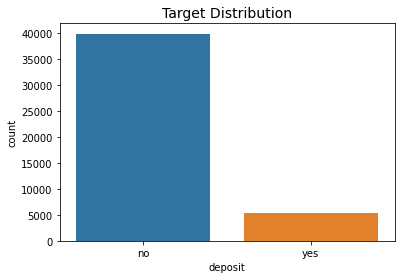

In [12]:
sns.countplot(df['deposit'])
plt.title("Target Distribution", fontsize=14)

In [13]:
num_var= df.select_dtypes(include='int64')
cat_var = df.select_dtypes(include = 'object')


In [14]:
cat_var

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


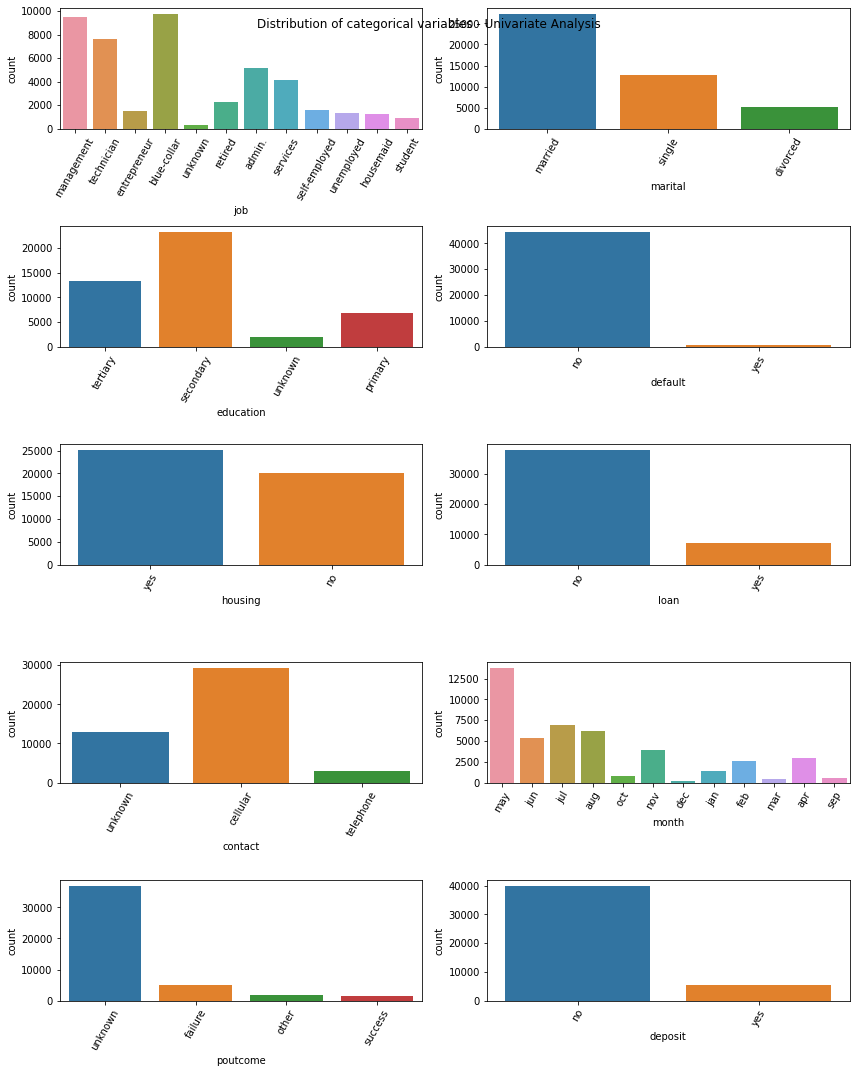

In [15]:
fig,ax = plt.subplots(5,2,figsize=(12,15))
for col,subplot in zip(cat_var,ax.flatten()):
    sns.countplot(x = df[col],ax = subplot)
    subplot.tick_params(axis='x', rotation=60)
plt.suptitle('Distribution of categorical variables - Univariate Analysis')
plt.tight_layout()

In [16]:
num_var= df.select_dtypes(include='int64')
columns=num_var.columns
print(columns)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


In [17]:
num_var

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [17]:
from scipy.stats import norm

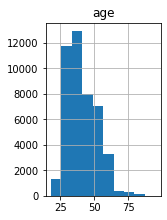

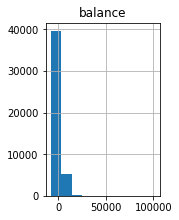

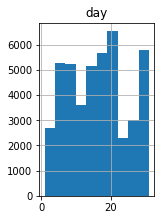

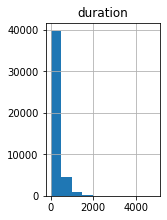

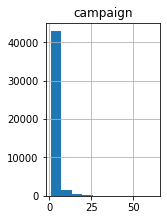

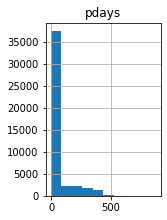

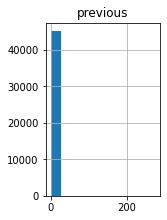

In [18]:
def plotvariable(df,variable):
  plt.figure(figsize=(7,7))
  plt.subplot(2,3,1)  #means in sub plot 2 row , 3 cloumns and first plot
  df[variable].hist(bins=10)
  plt.title(col)

 

for col in columns[0:7]:
  plotvariable(df,col)

# **EDA Using sweetwiz**

In [19]:
!pip install sweetviz




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 2.0 MB/s 


                                             |          | [  0%]   00:00 -> (? left)

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



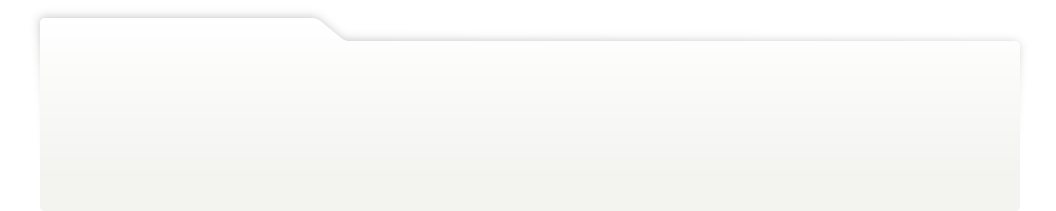
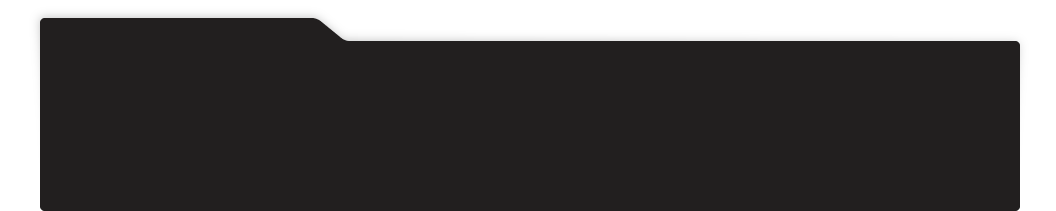
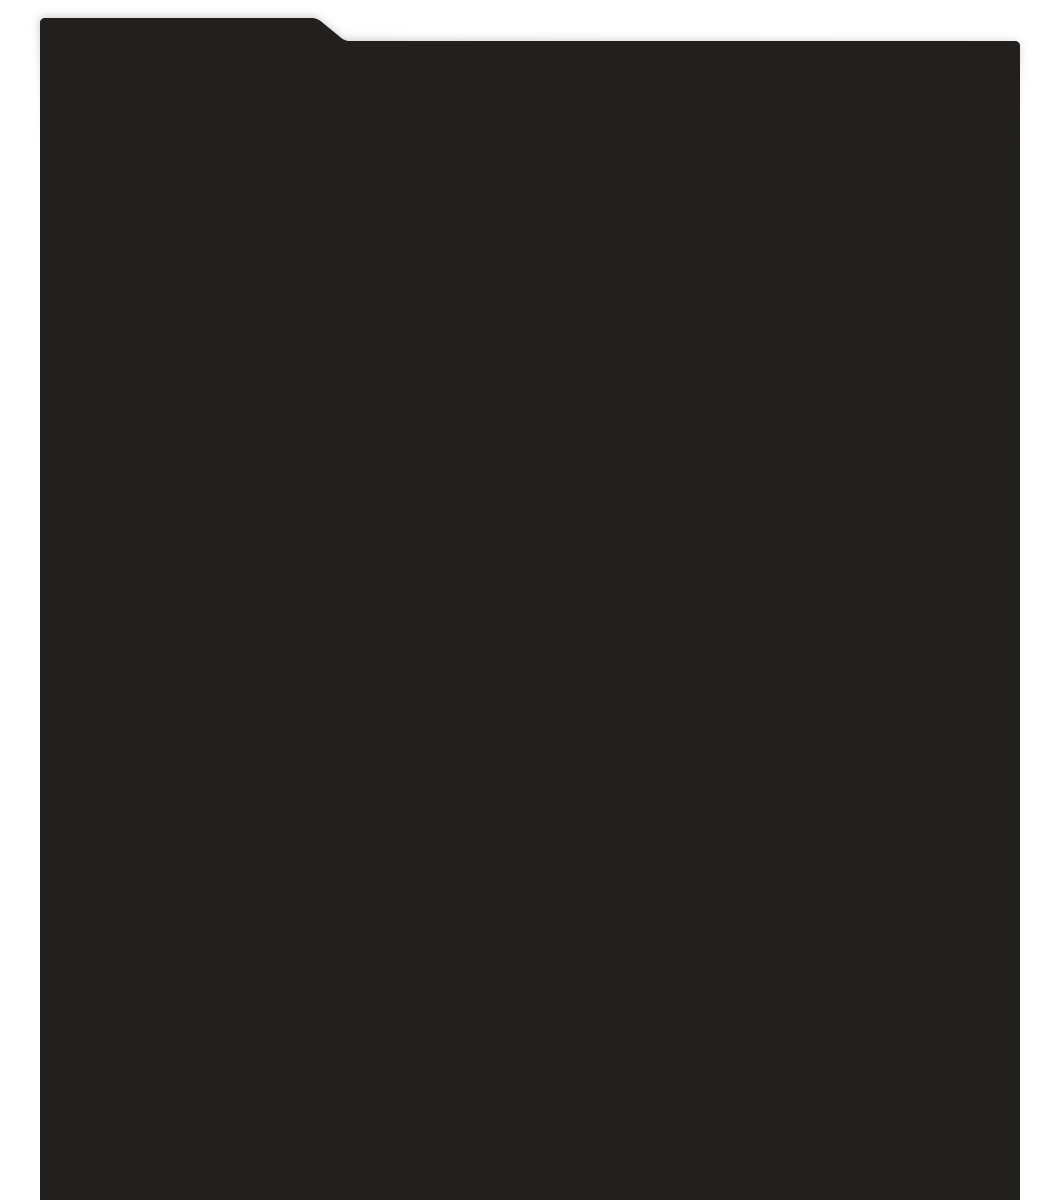
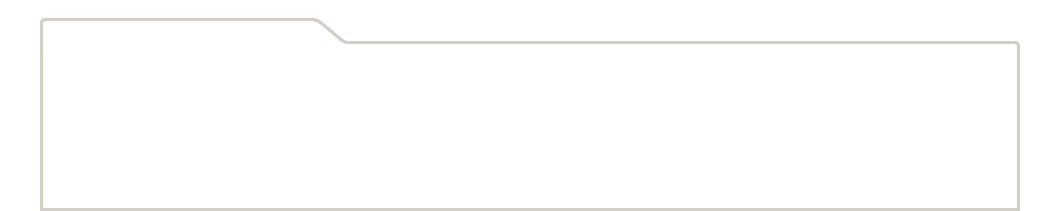
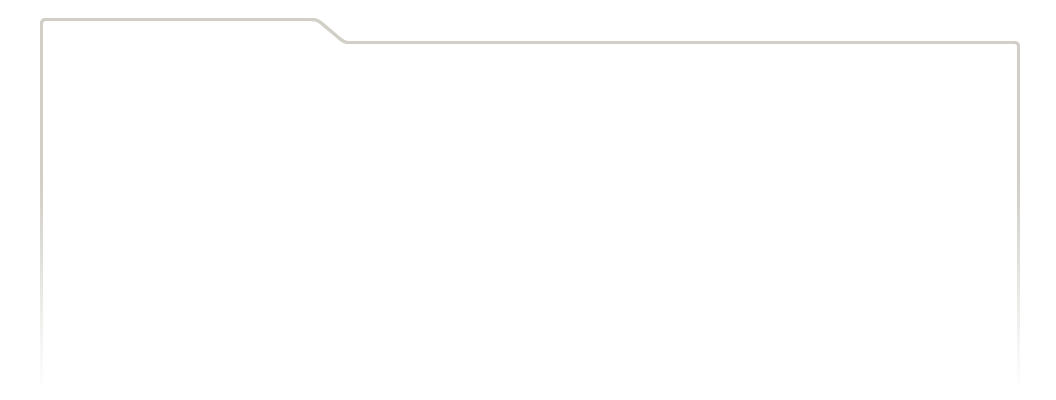
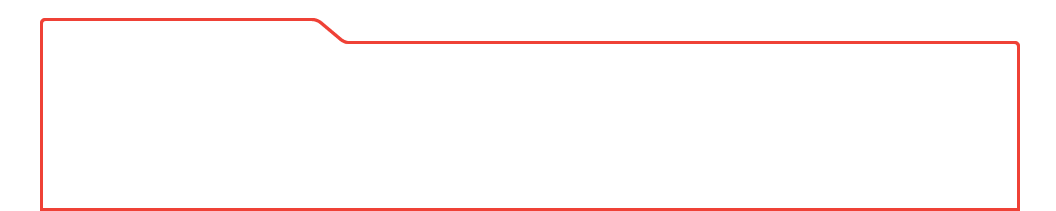
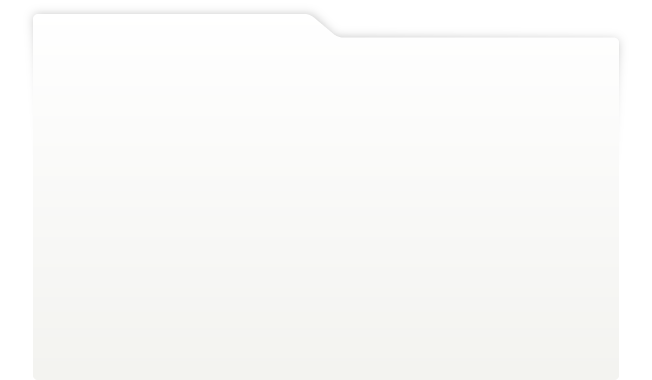
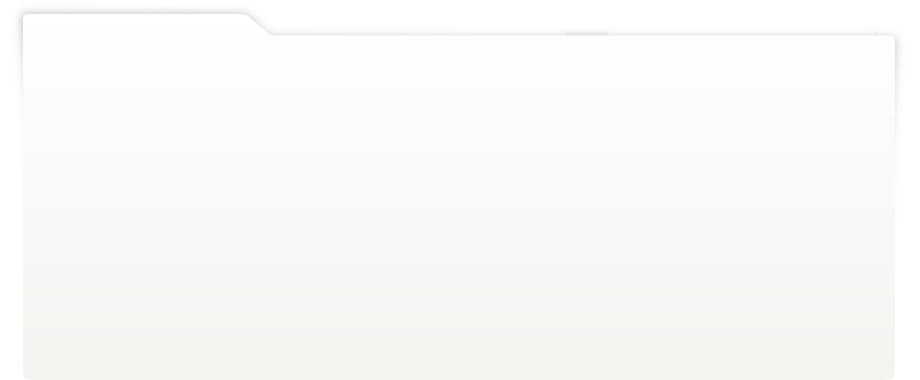
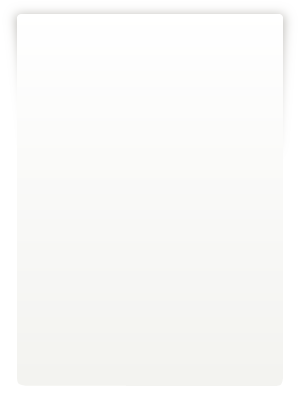
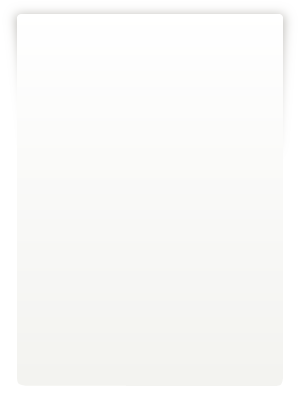
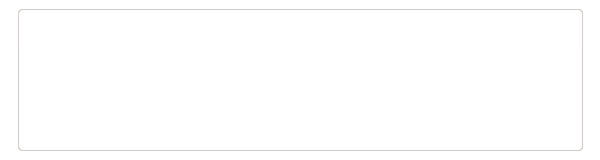
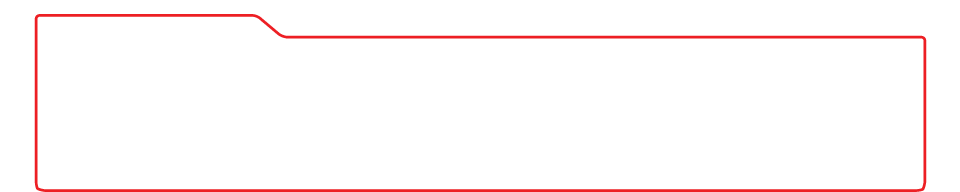
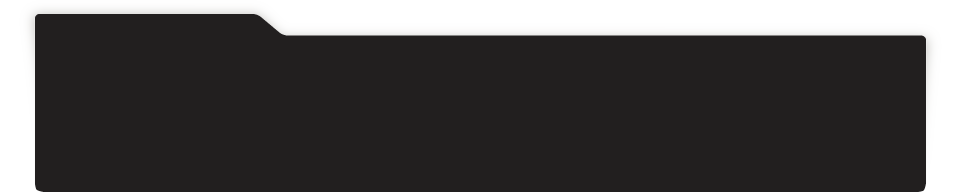
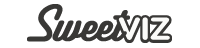
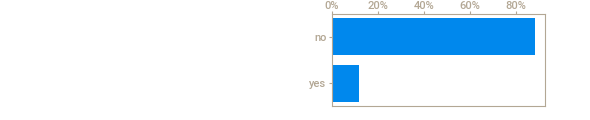
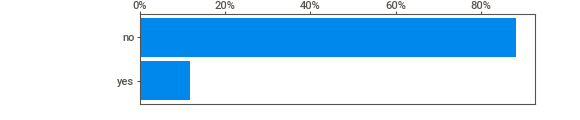
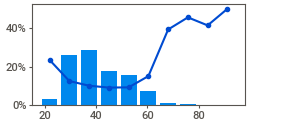
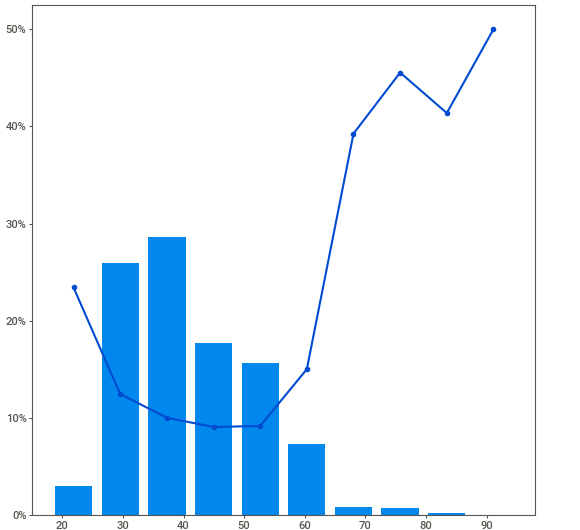
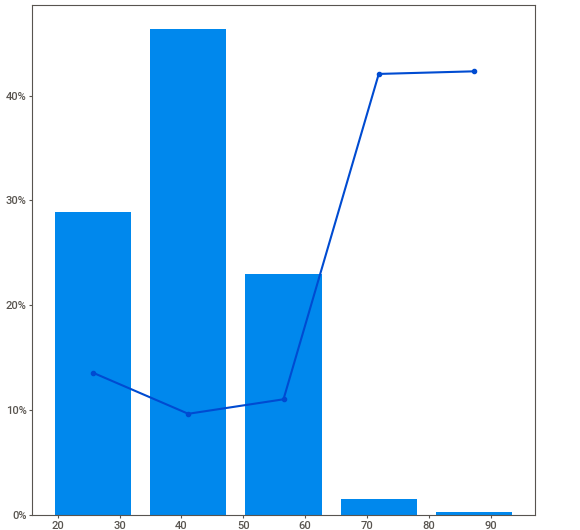
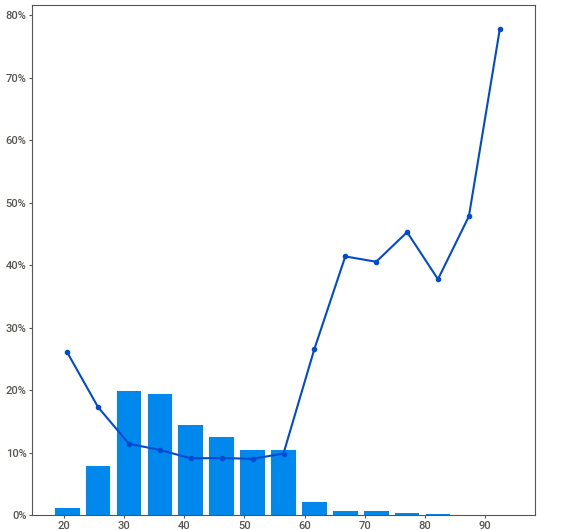
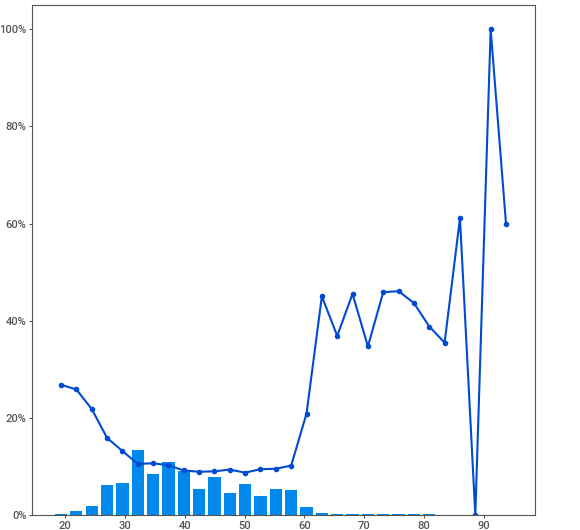
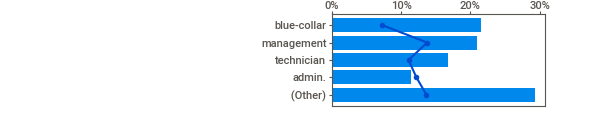
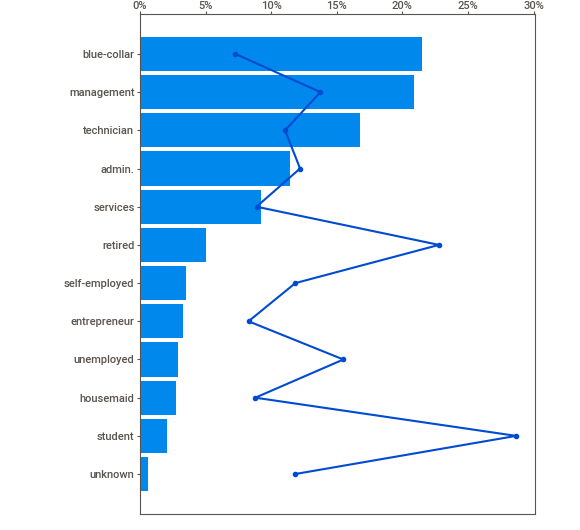
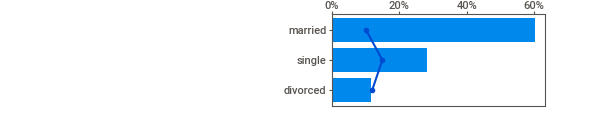
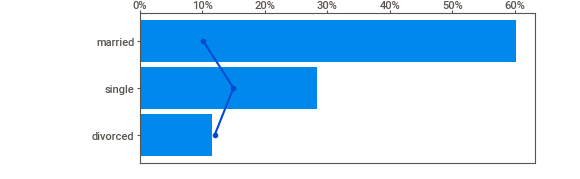
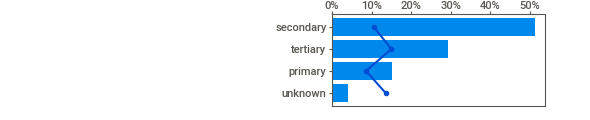
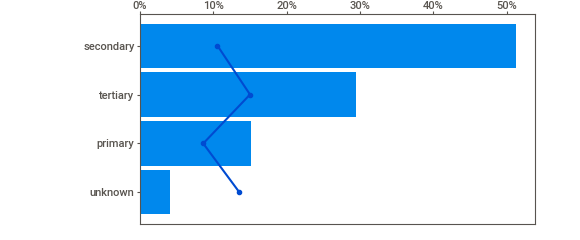
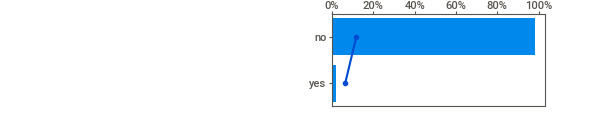
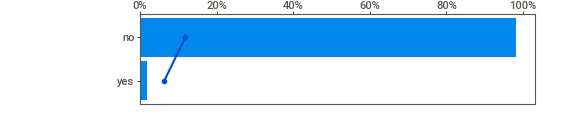
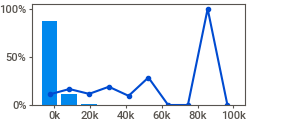
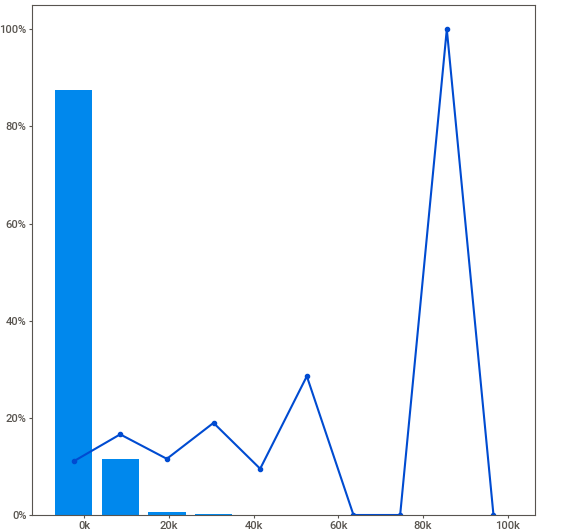
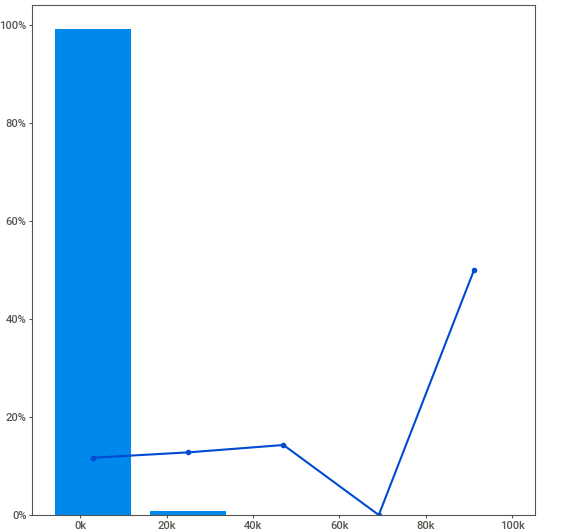
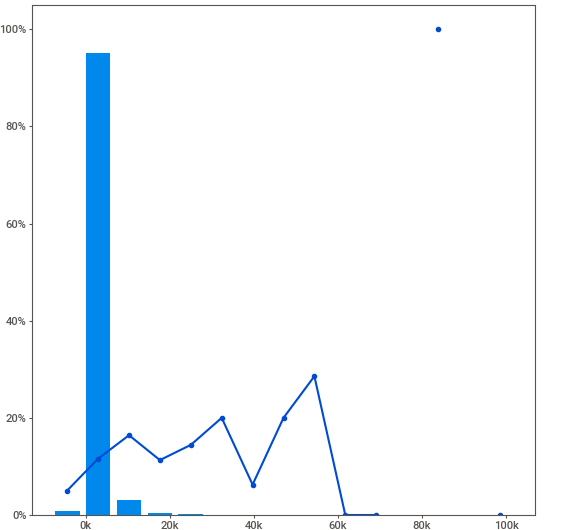
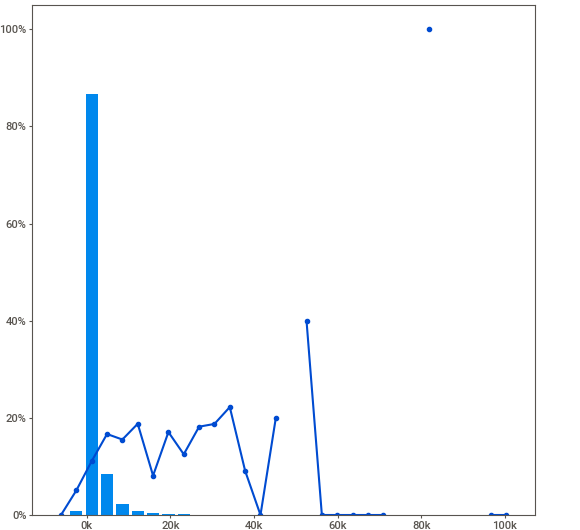
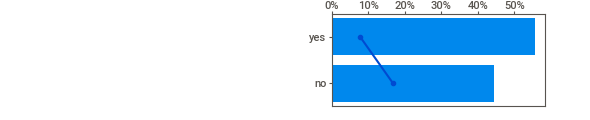
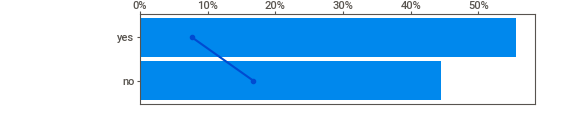
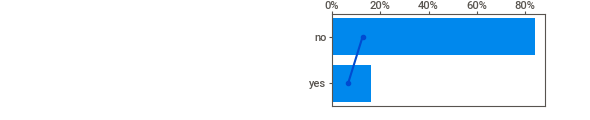
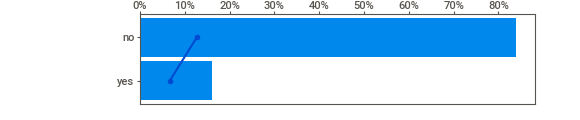
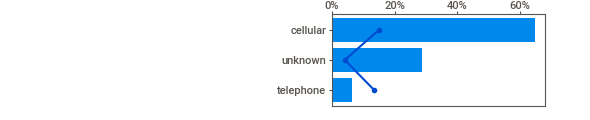
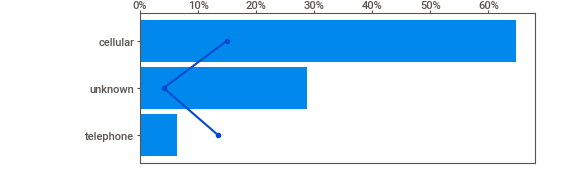
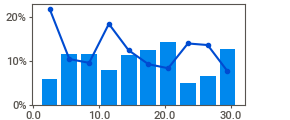
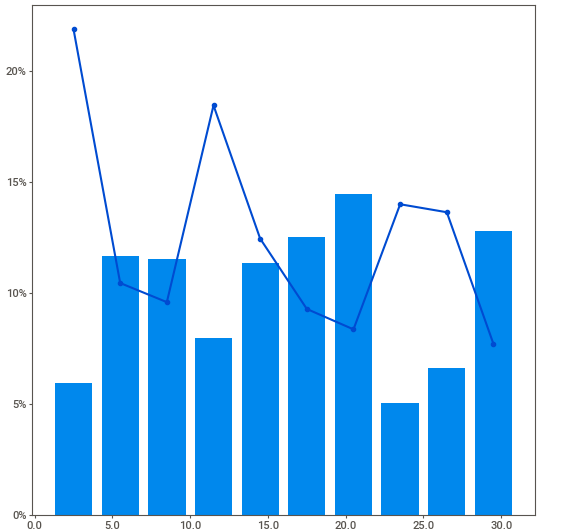
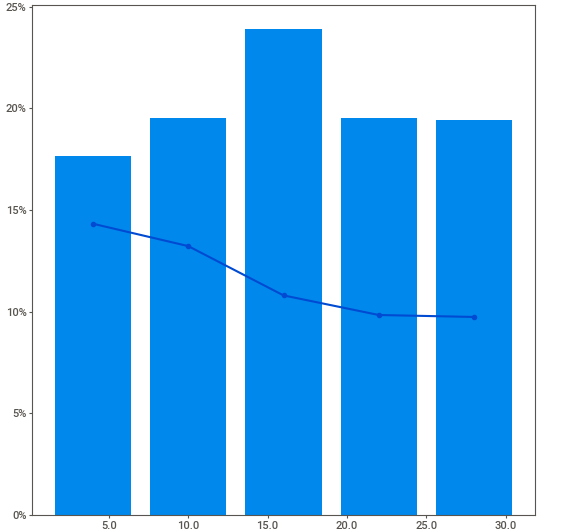
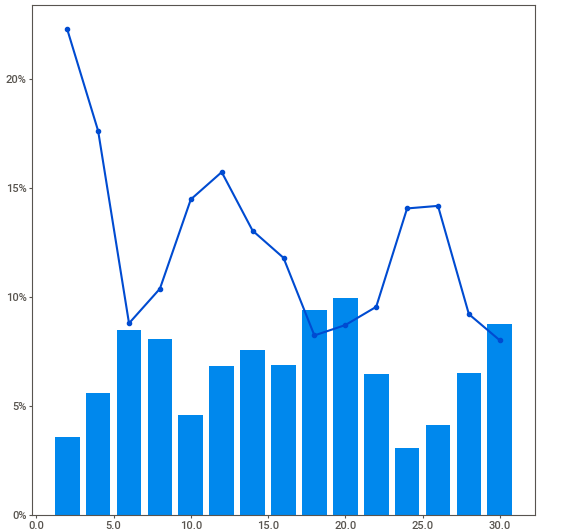
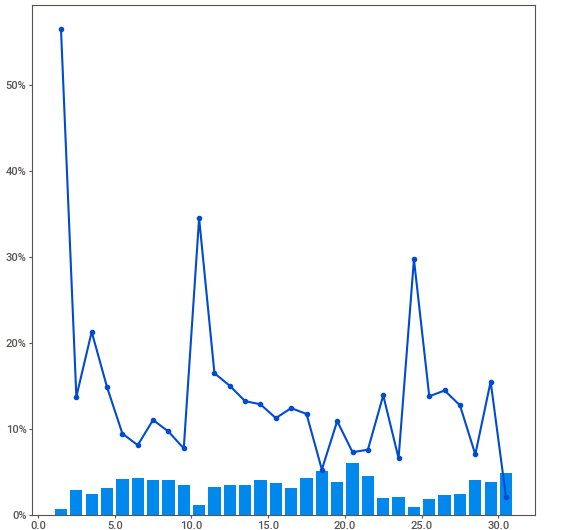
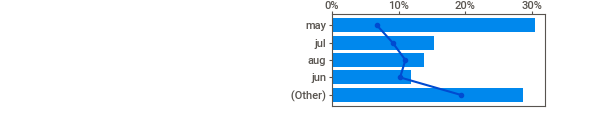
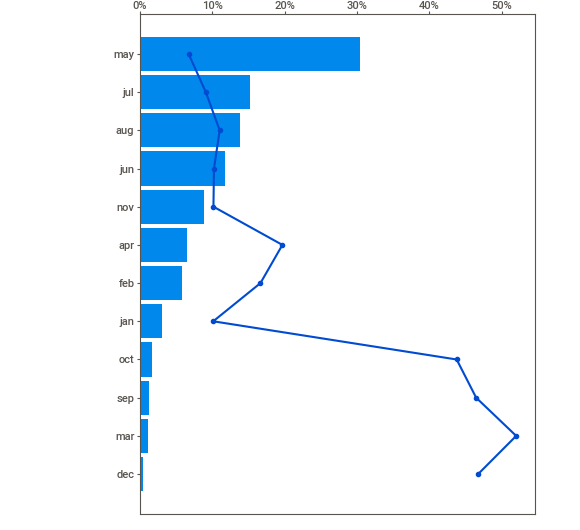
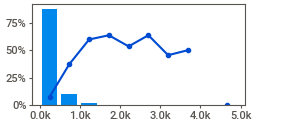
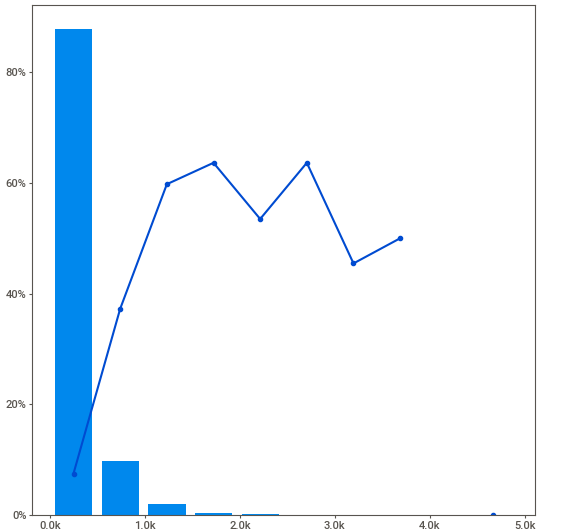
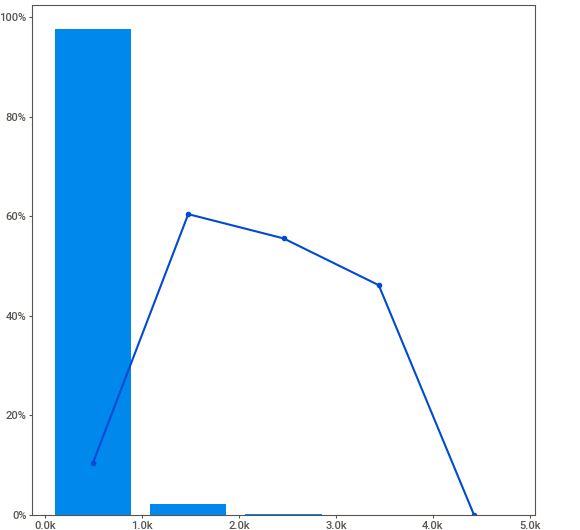
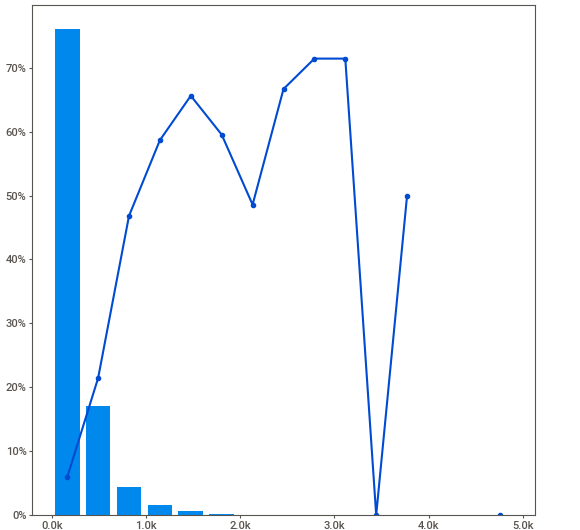
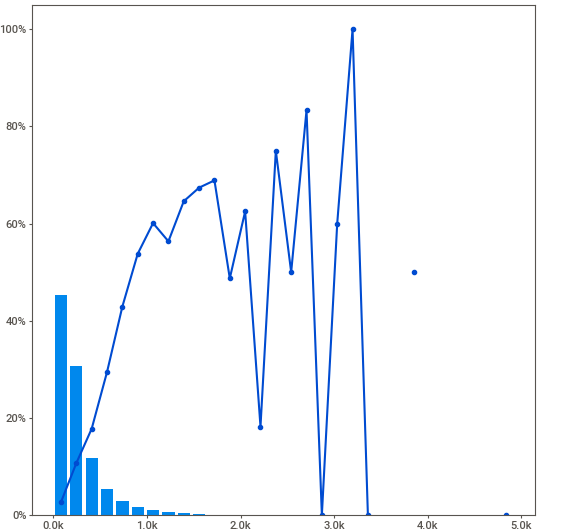
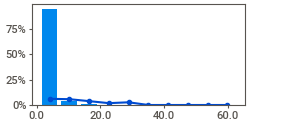
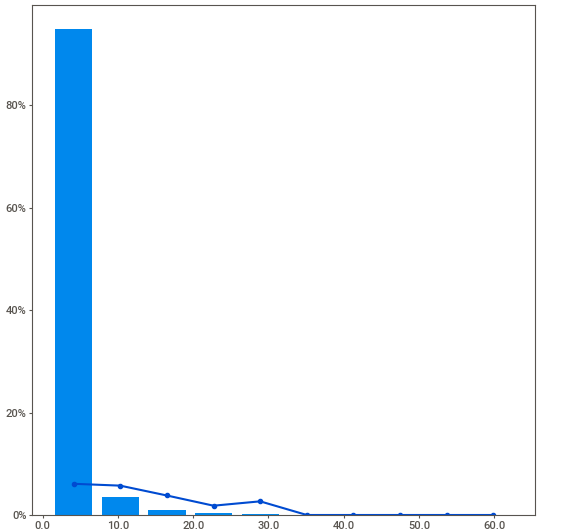
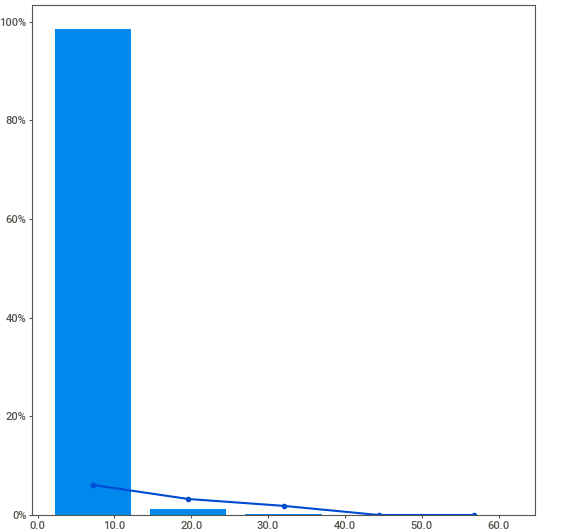
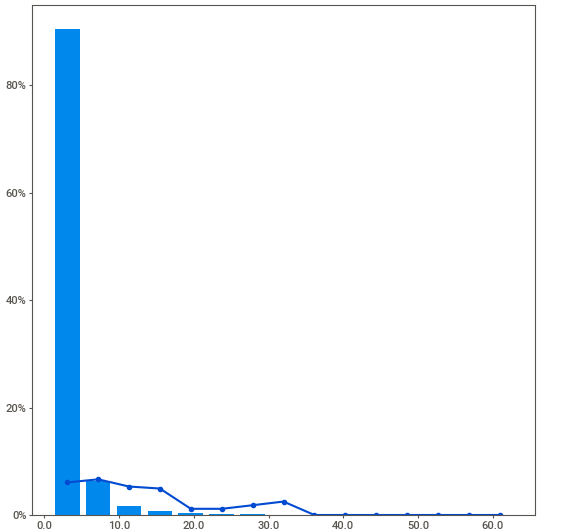
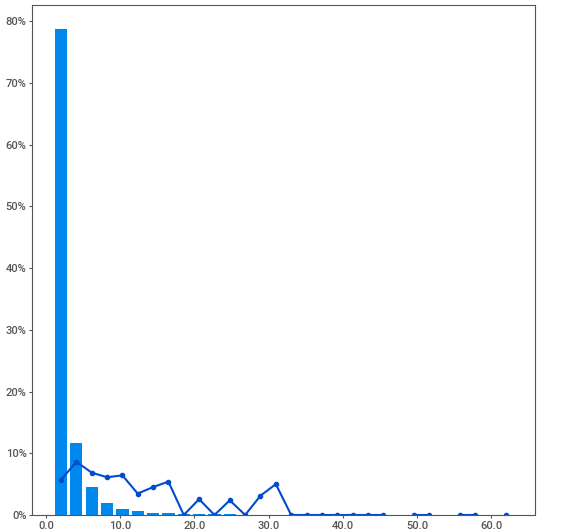
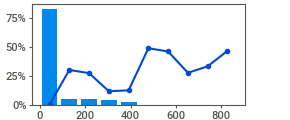
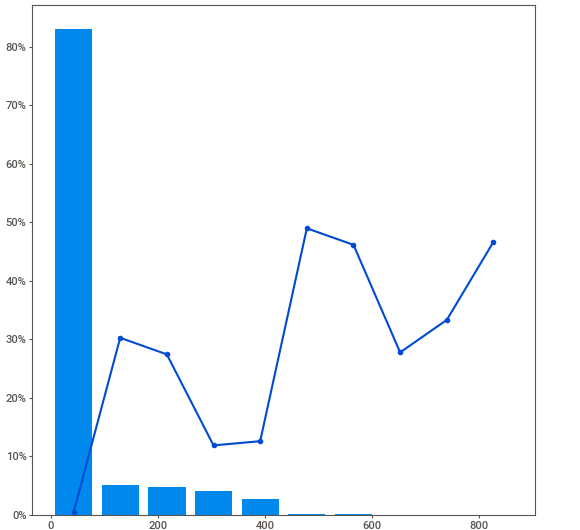
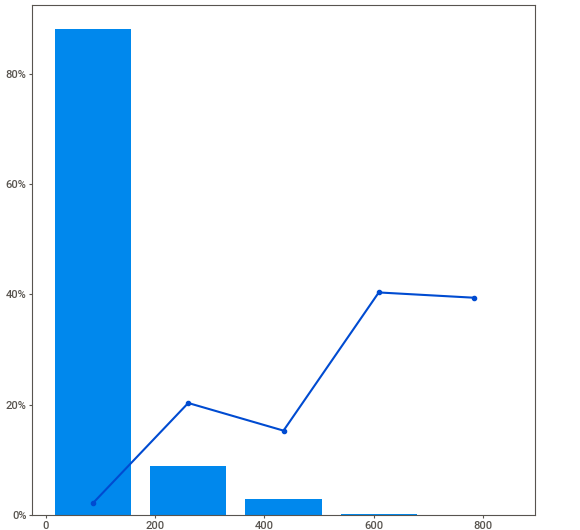
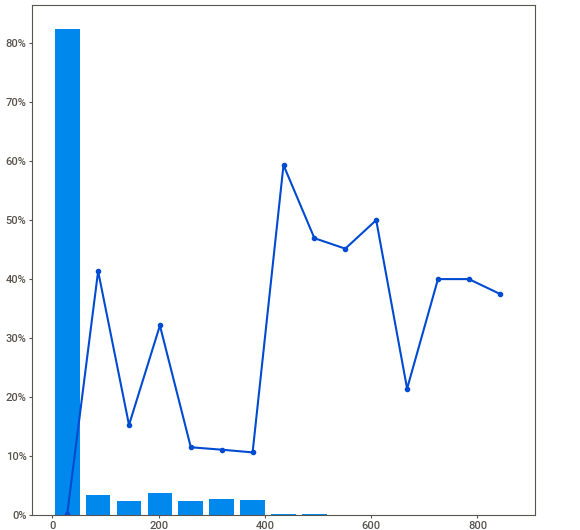
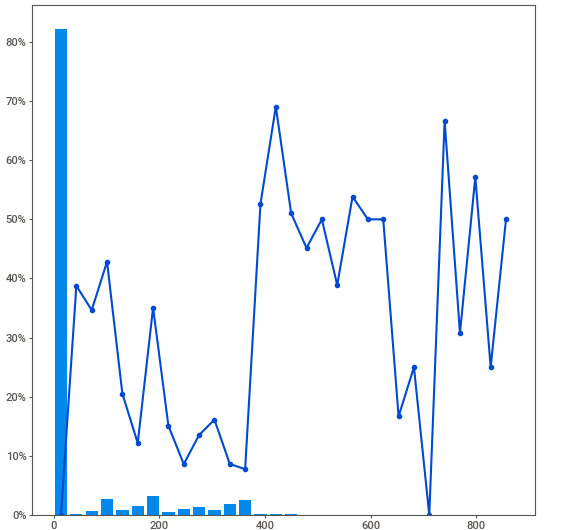
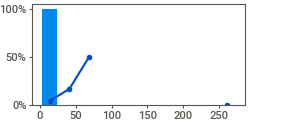
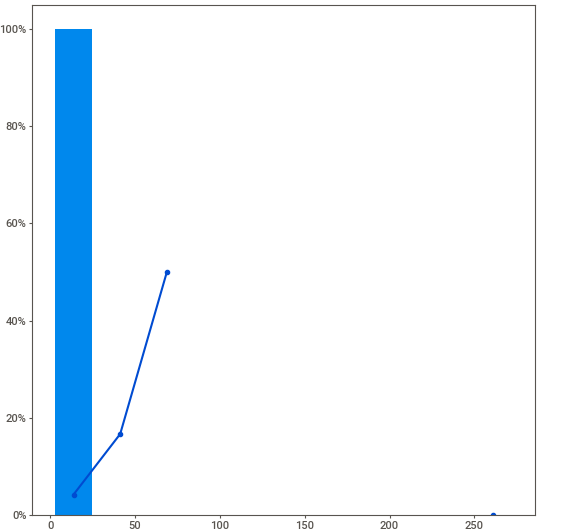
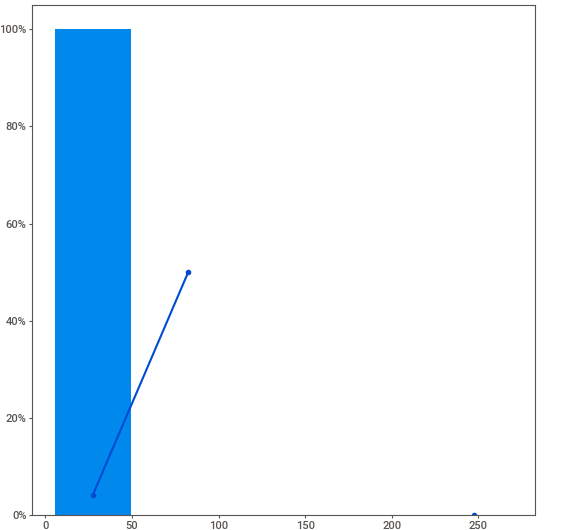
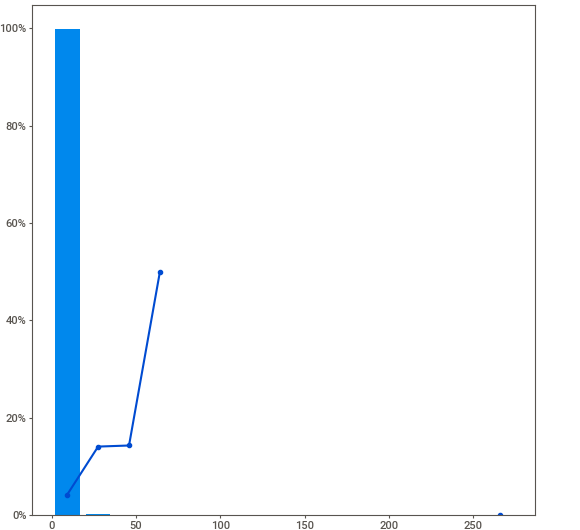
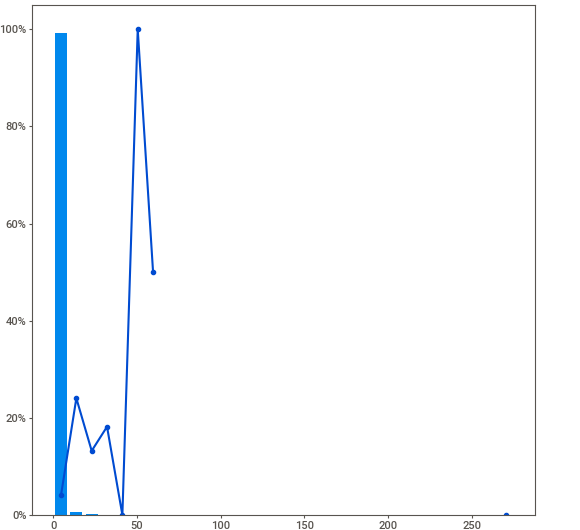
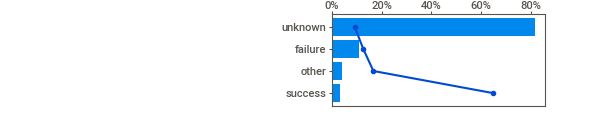
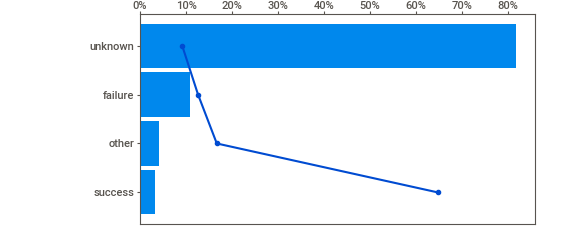
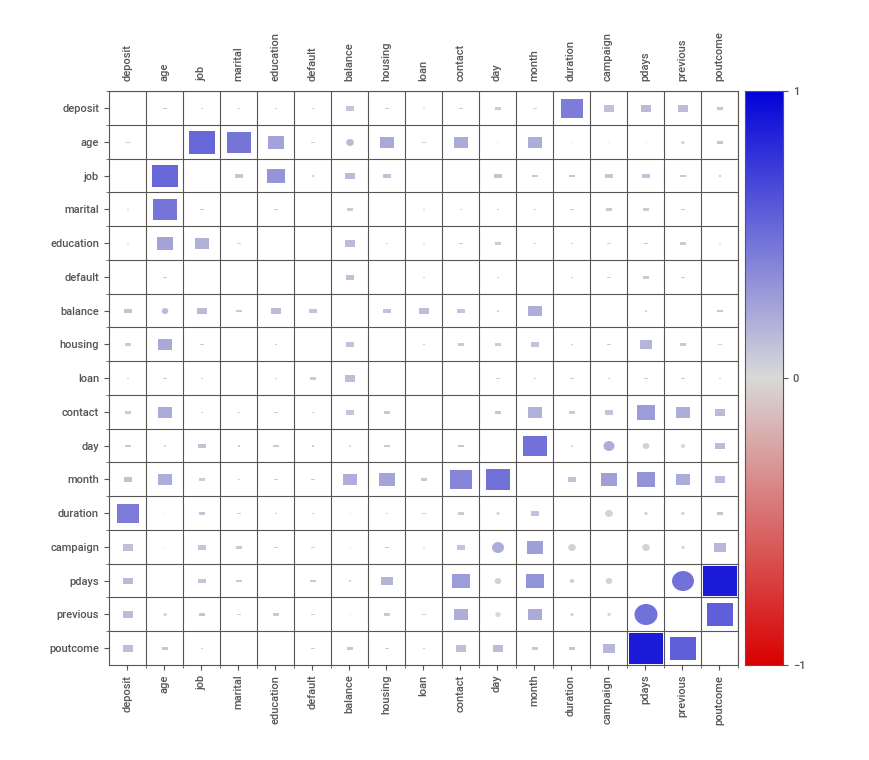
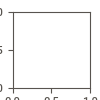

In [20]:
import sweetviz 

my_report = sweetviz.analyze([df, "df"],target_feat='deposit')

my_report.show_html('Report.html')

import IPython
IPython.display.HTML('Report.html')

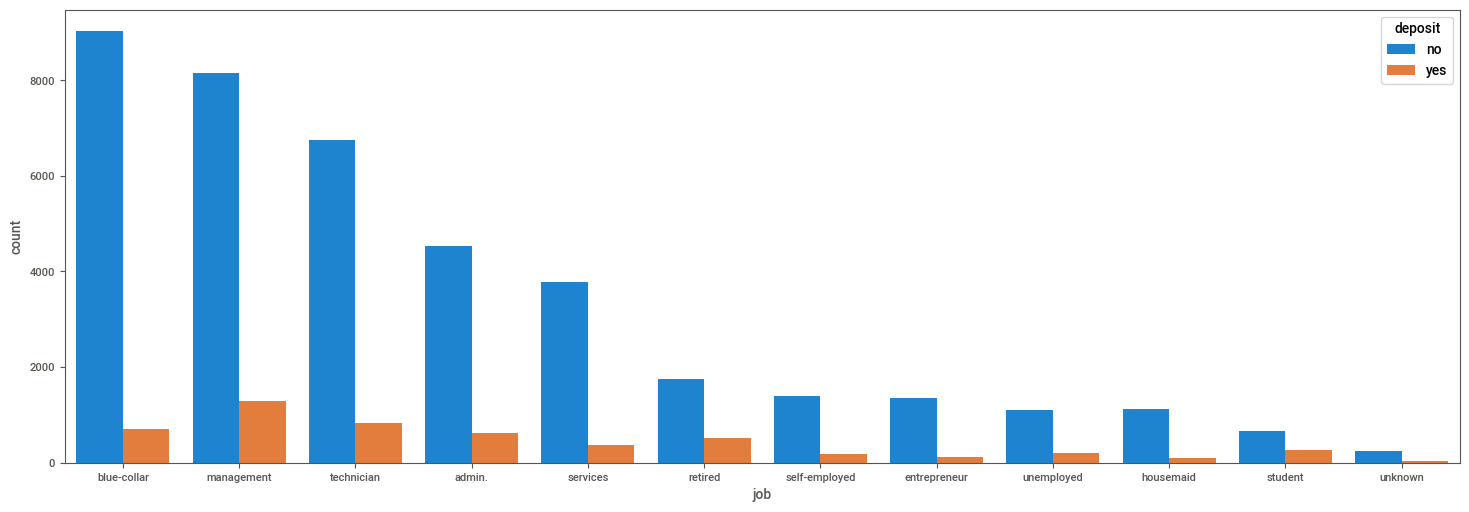

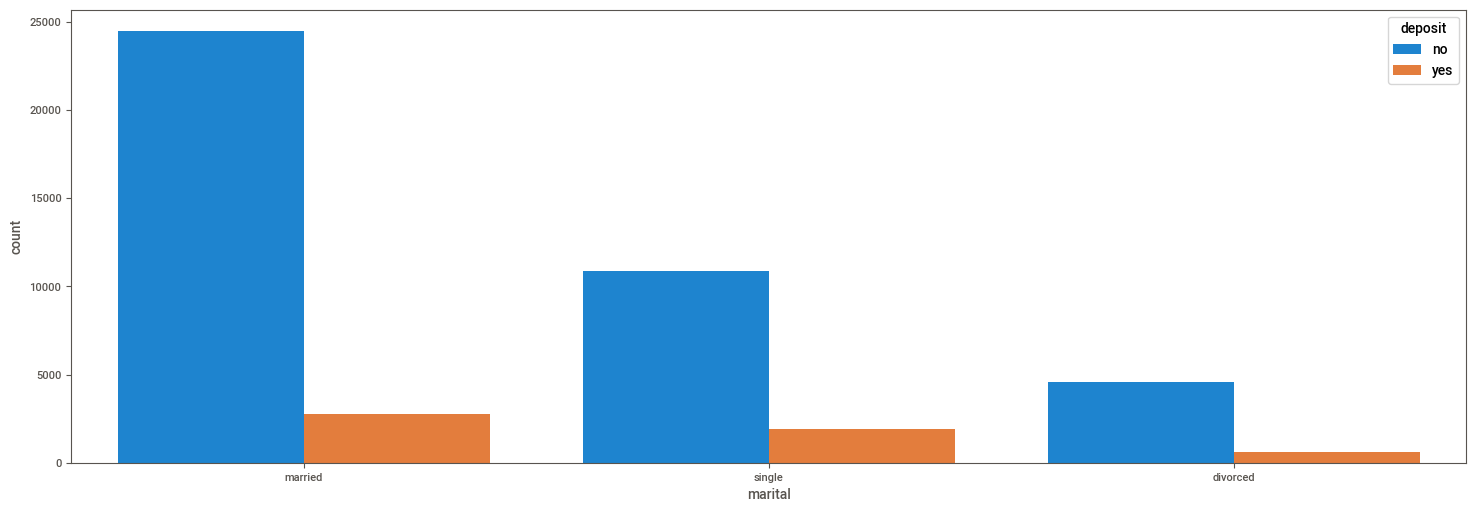

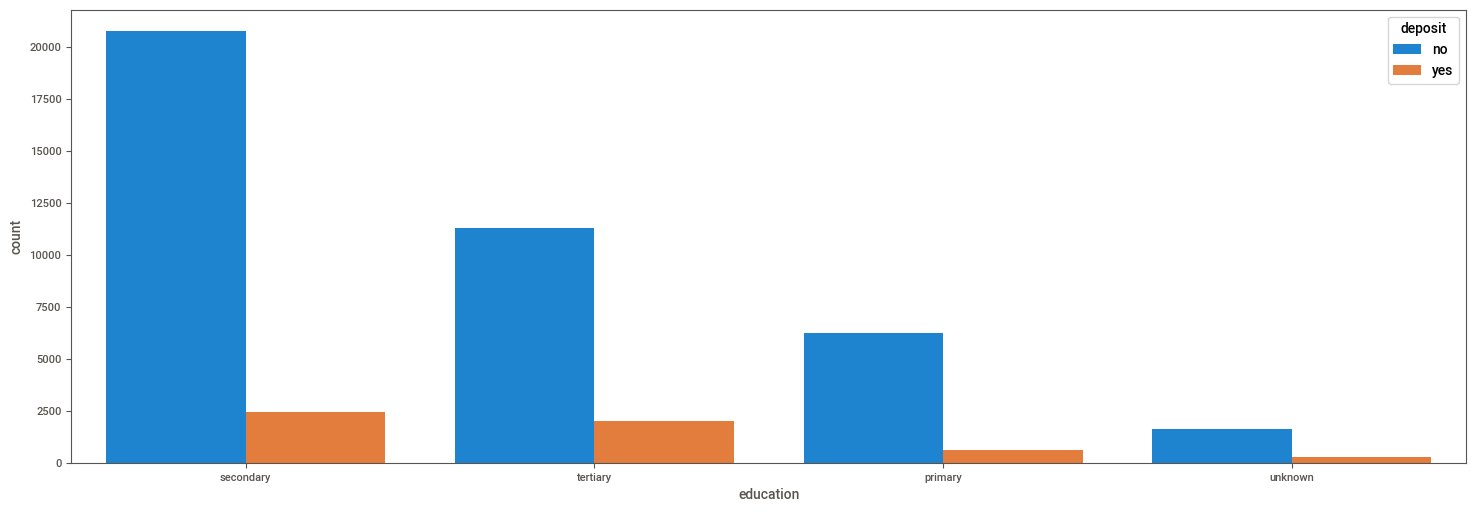

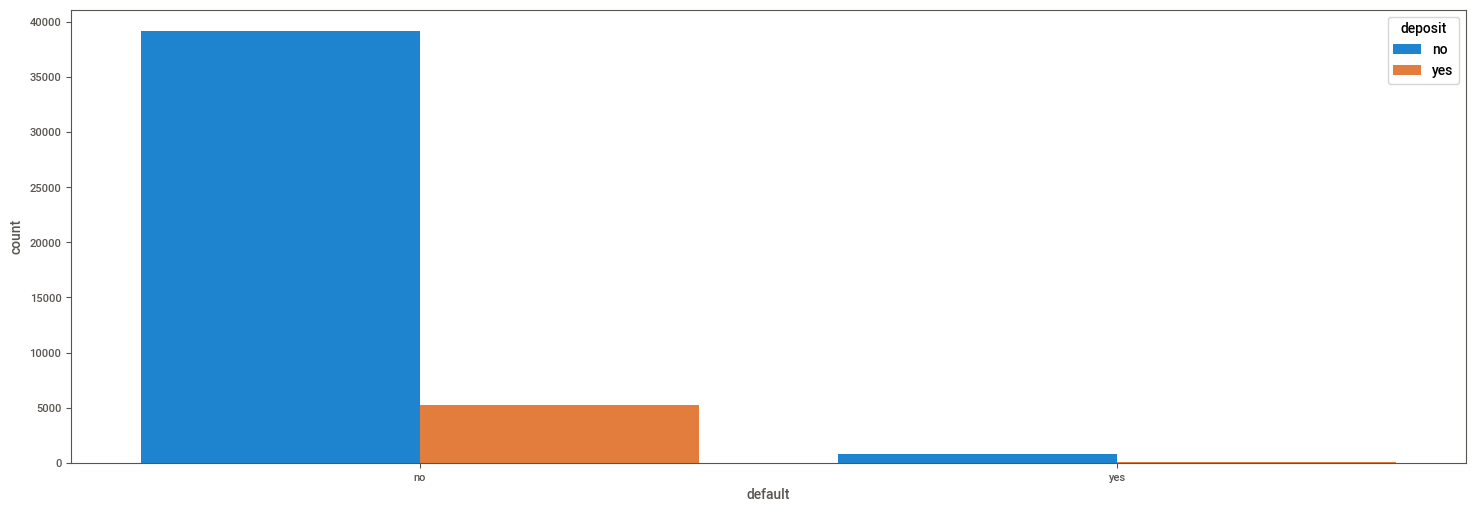

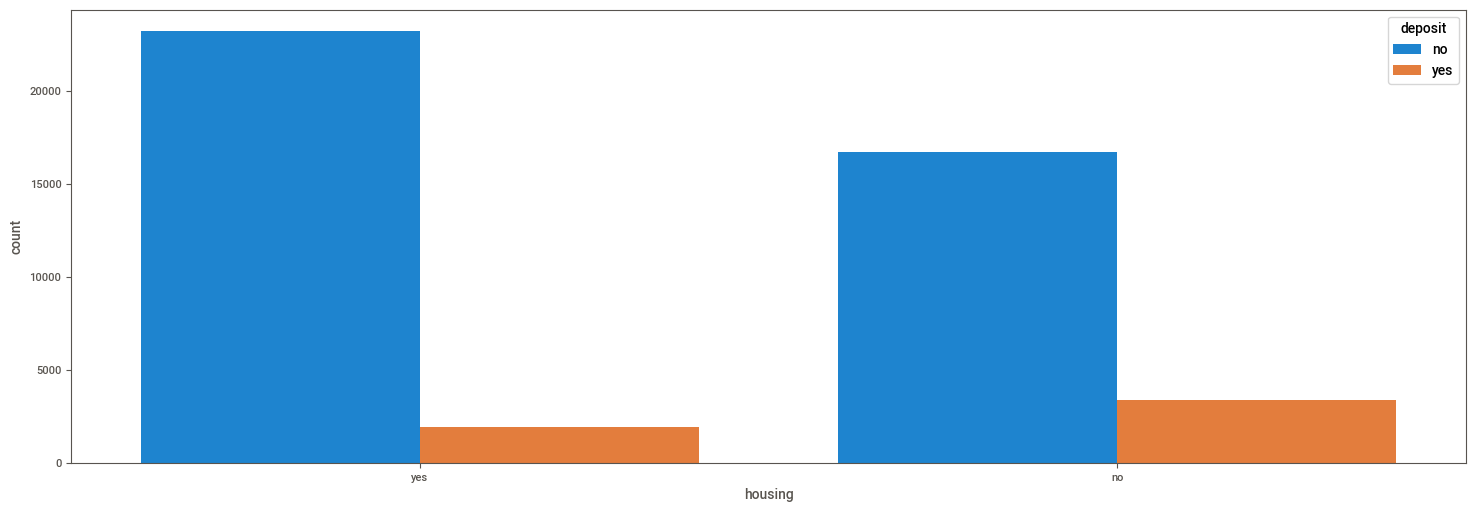

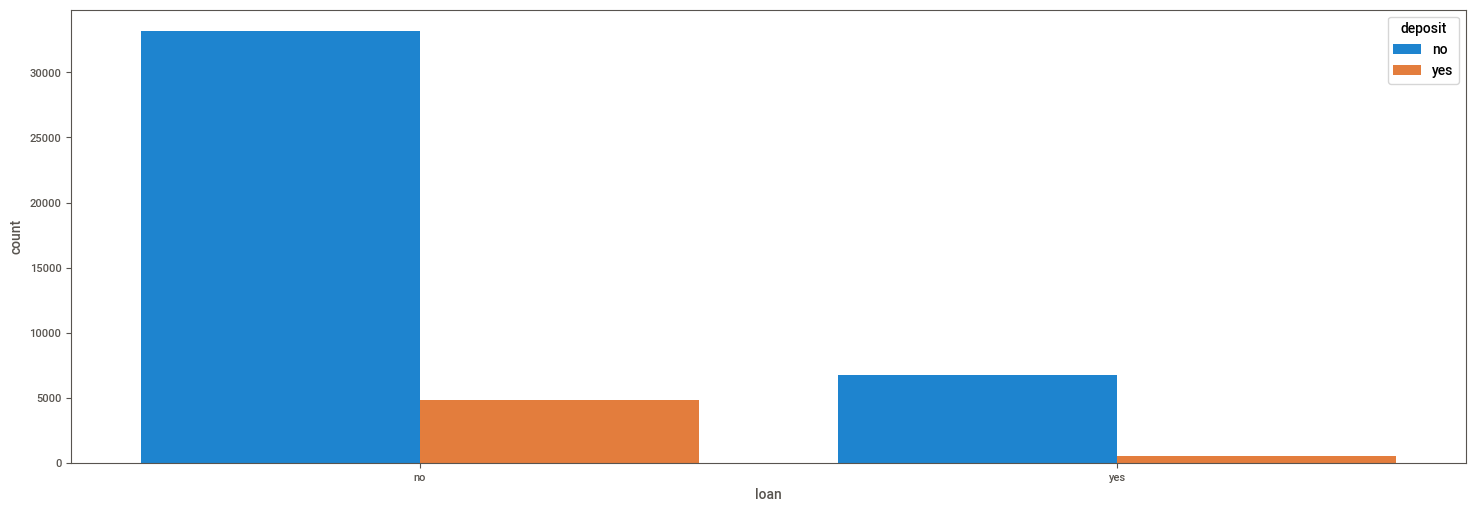

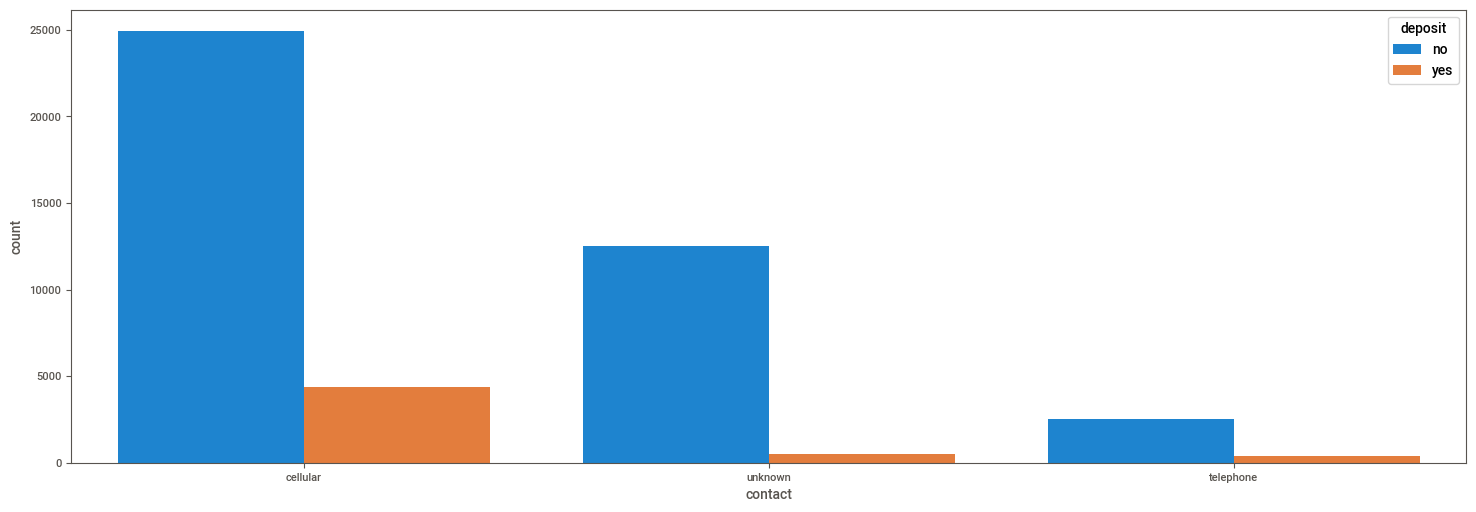

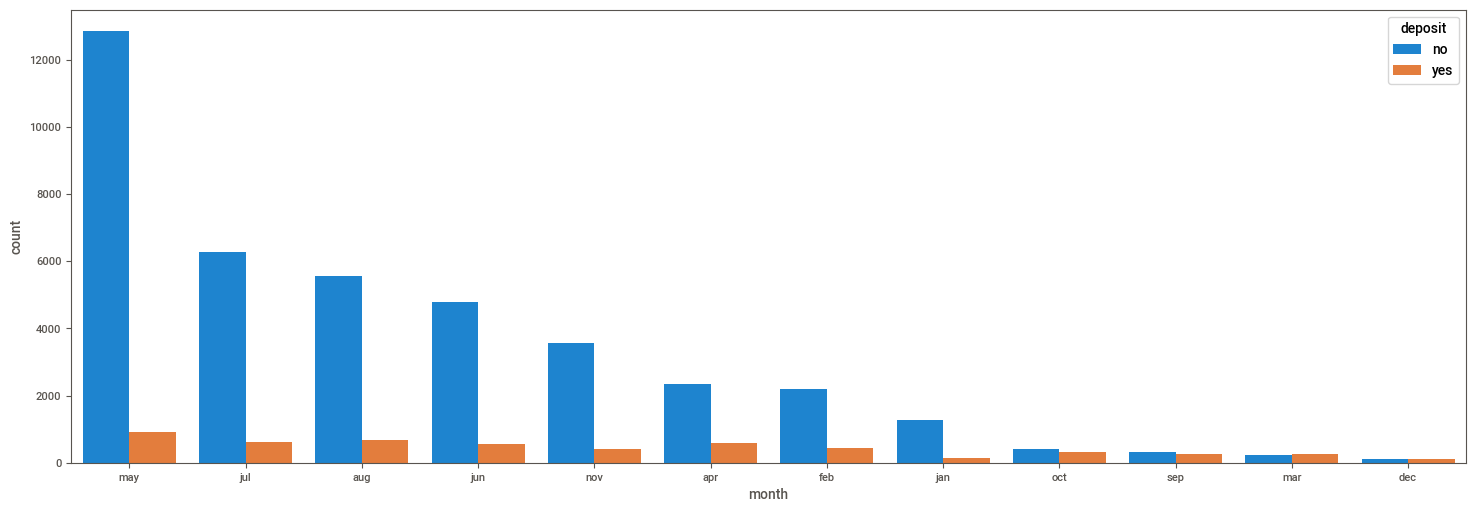

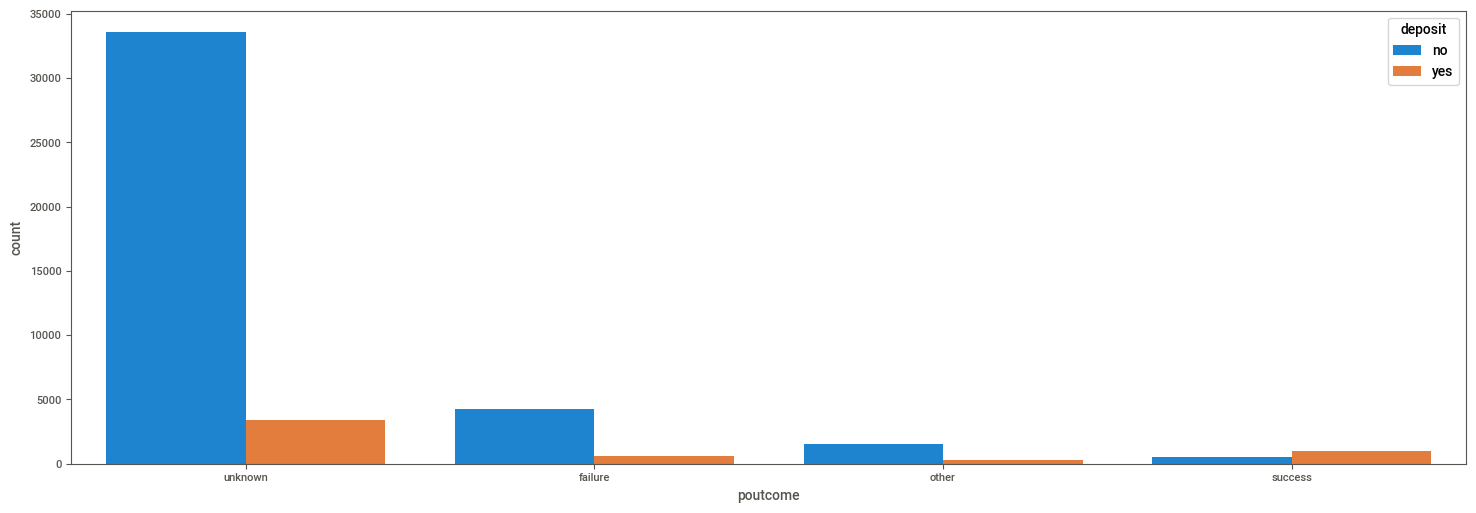

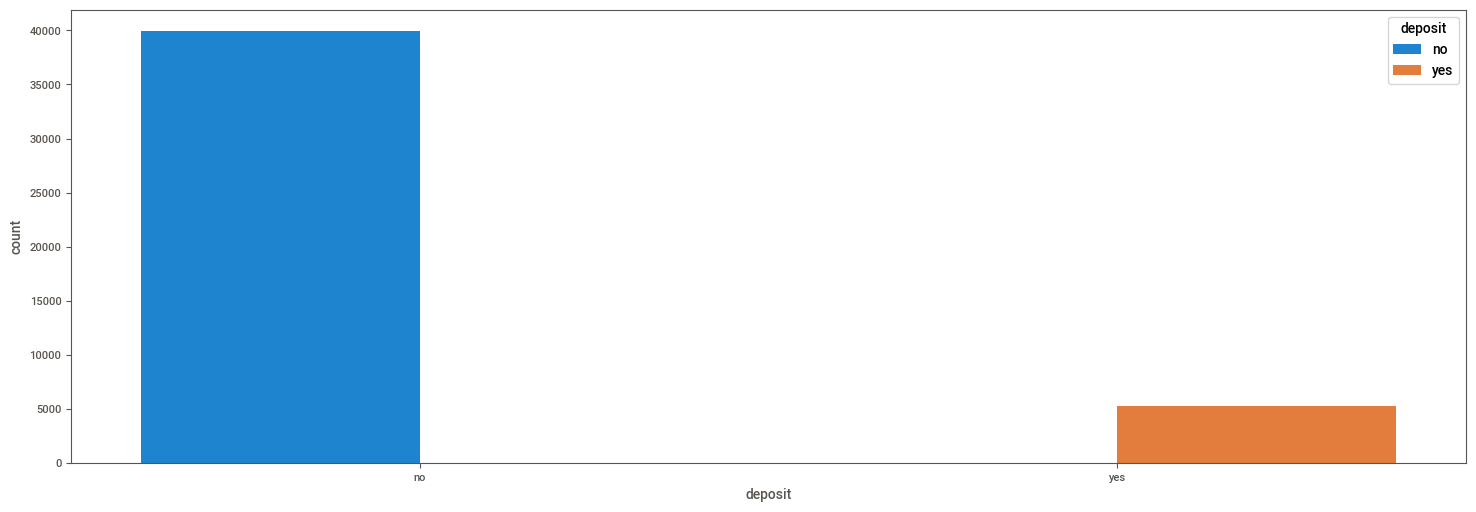

In [21]:
#Bivariate Analysis: Relationships of Categorical Features with Target


for c in cat_var:
    plt.figure(figsize=(18,6)) #this creates a new figure on which your plot will appear
    sns.countplot(x =c, hue='deposit', data = df ,order = df[c].value_counts().index) #individual bars sorted acc to frequency and then plotted

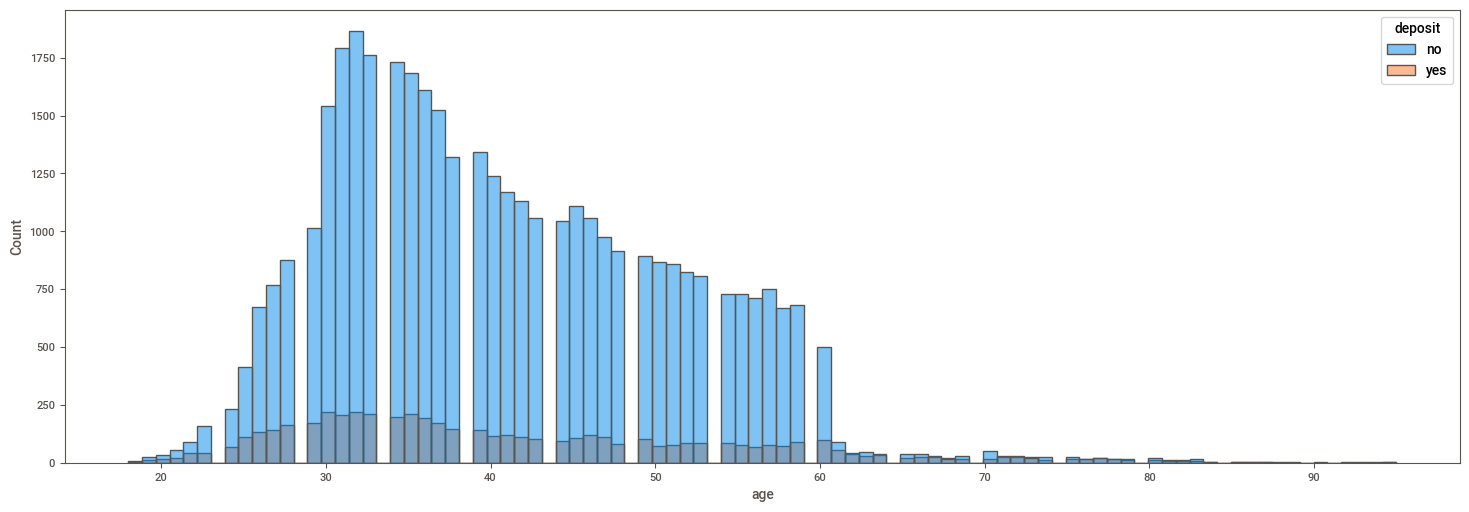

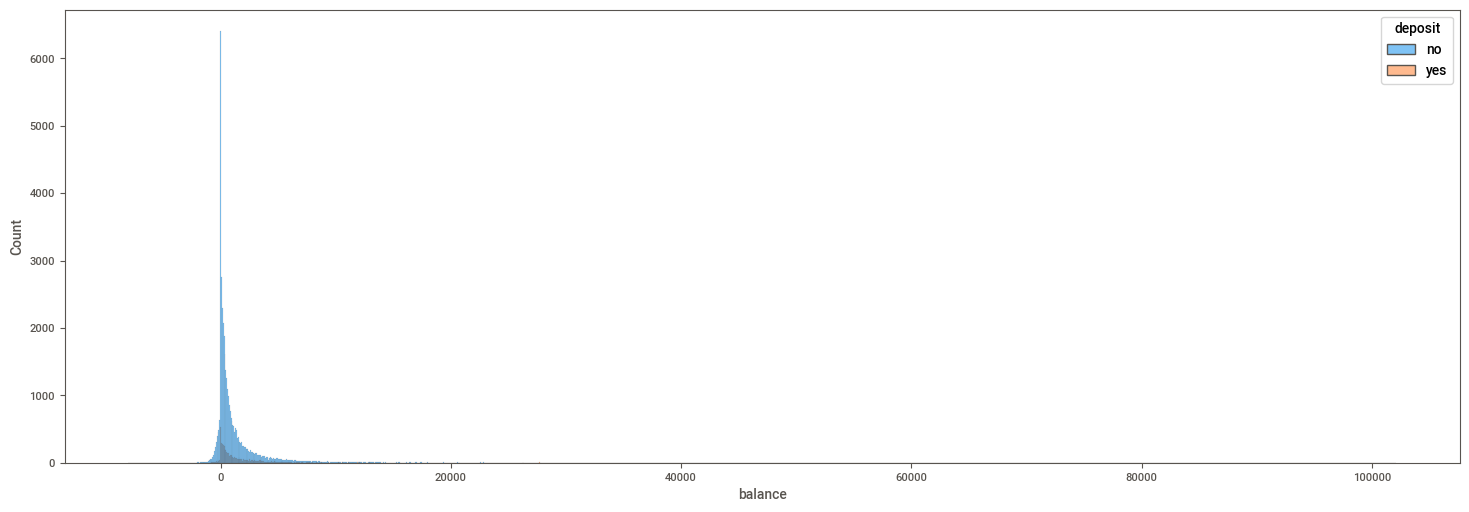

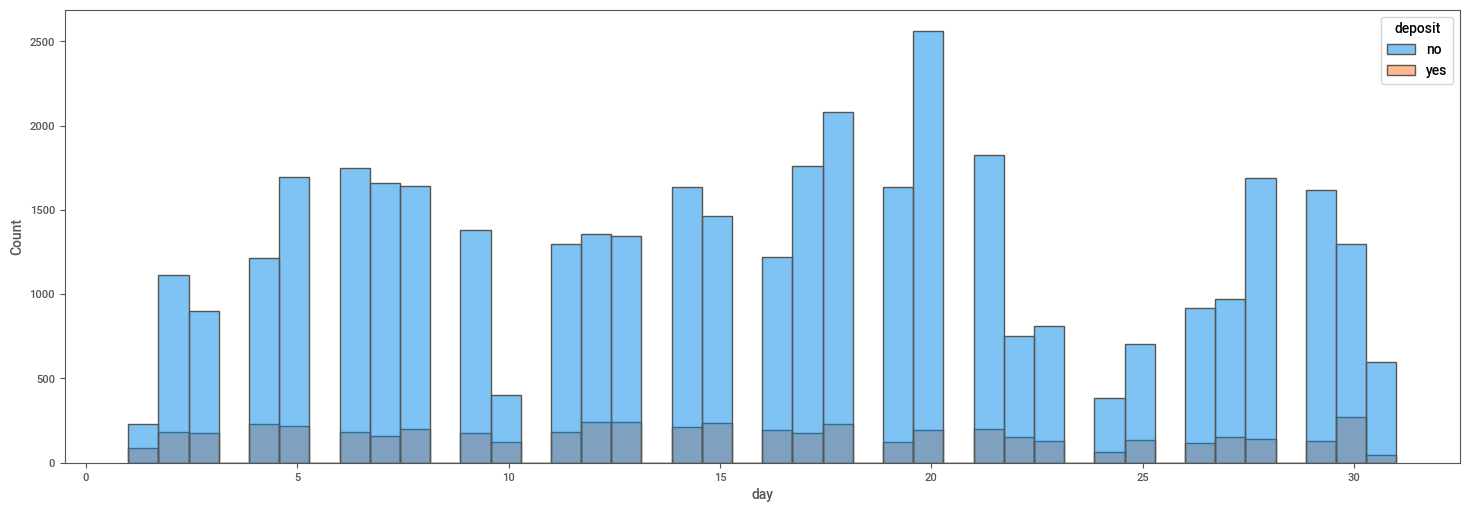

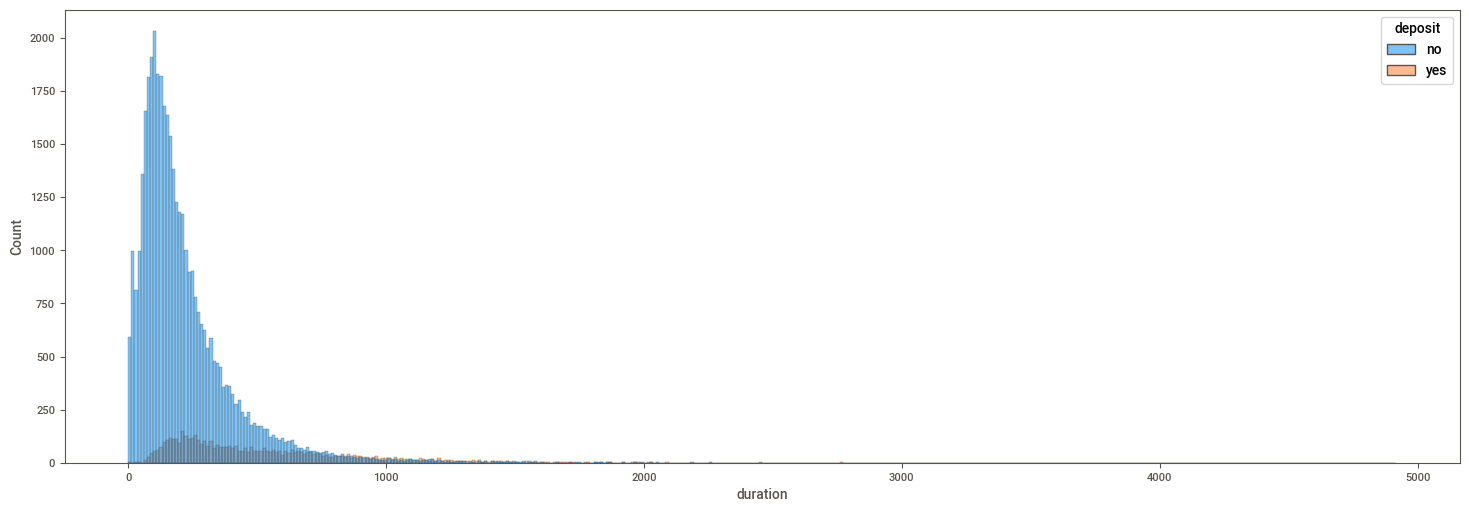

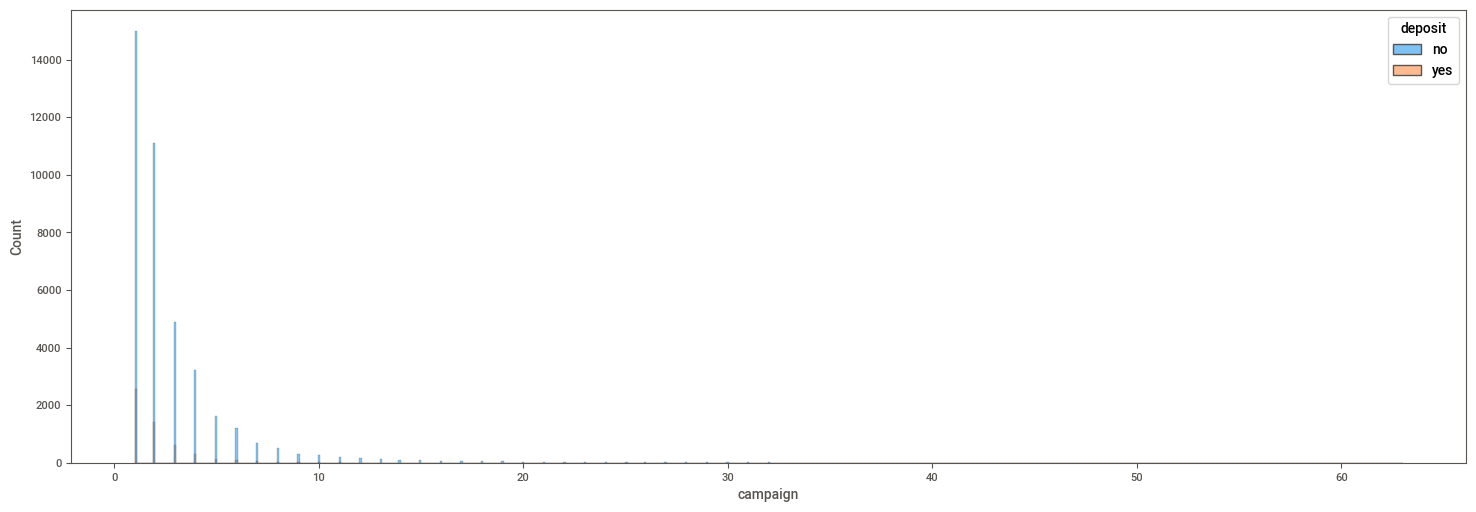

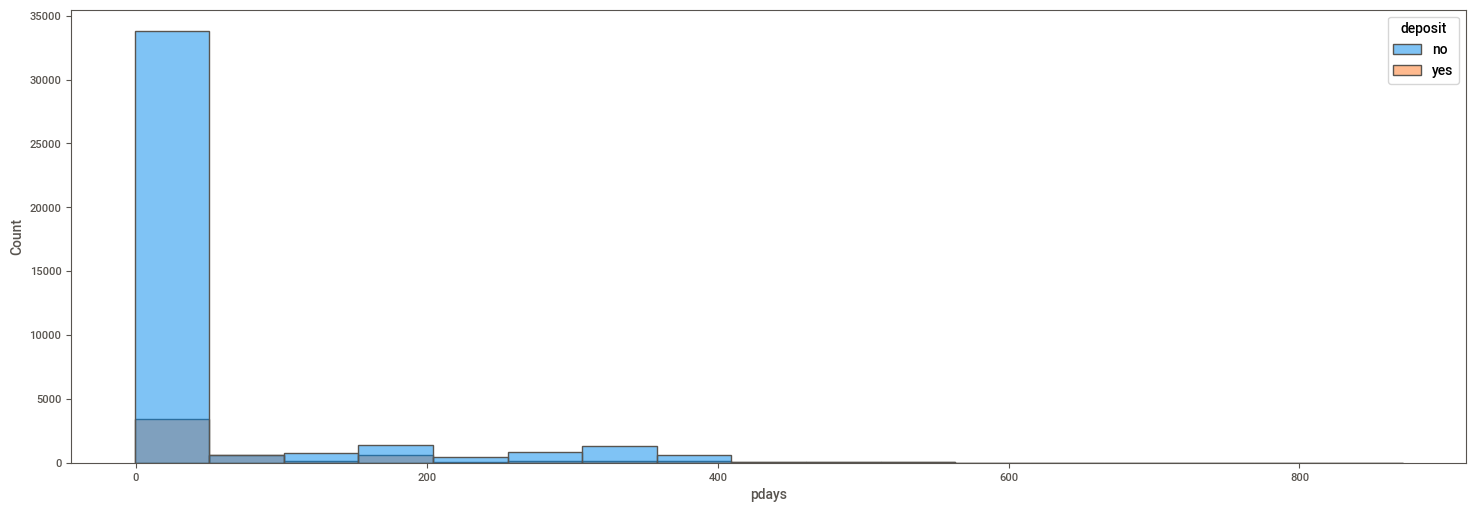

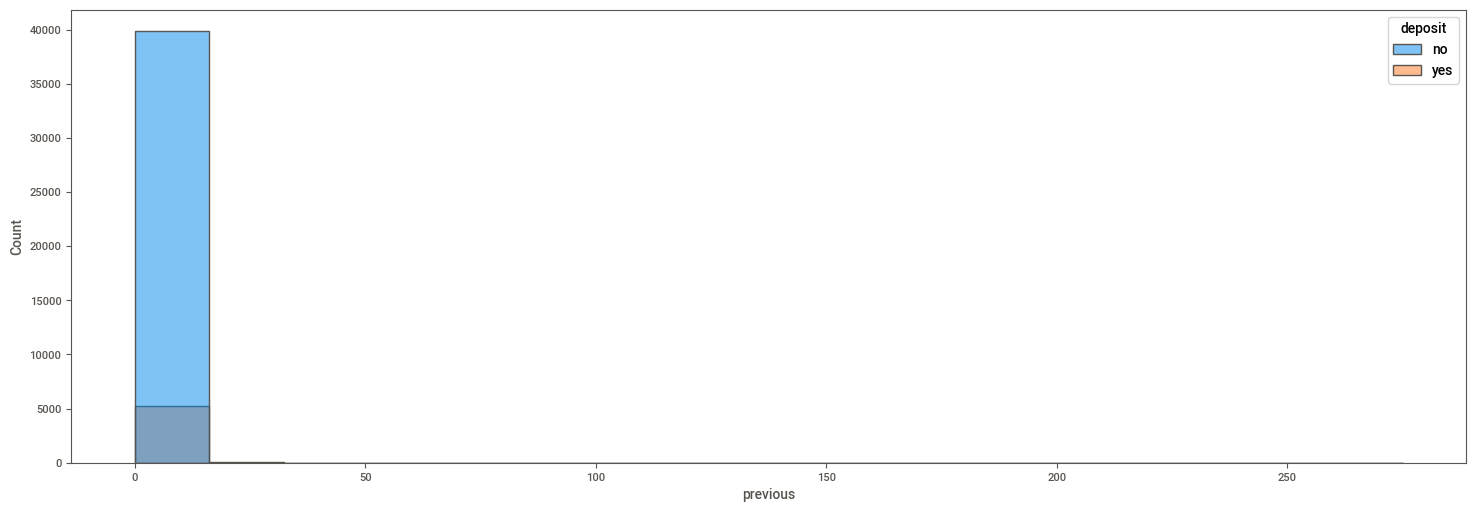

In [22]:
#Bivariate Analysis: Relationships of Numerical Features with Target

for c in num_var:
  plt.figure(figsize=(18,6))
  sns.histplot(data=df, x=c, hue="deposit")


In [22]:
num_var.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

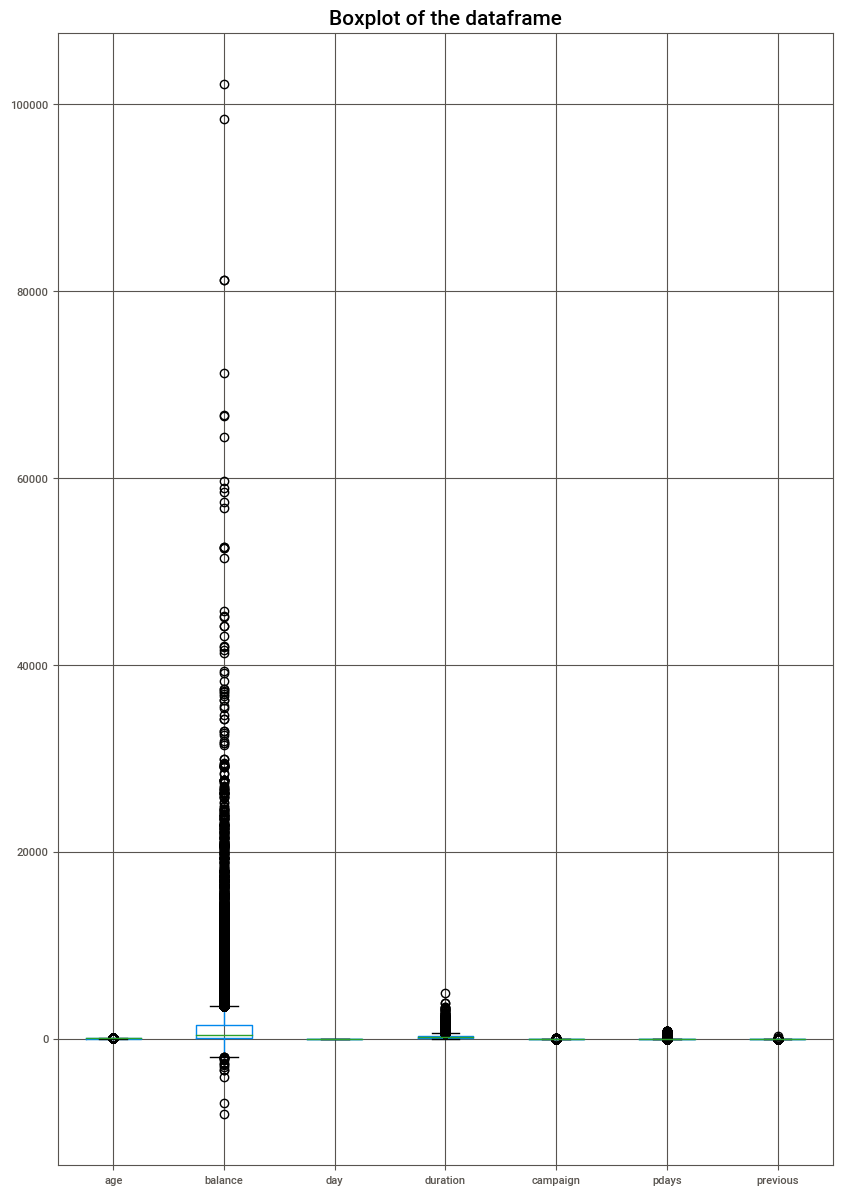

In [23]:
# checking for outliers in dataset
plt.figure(figsize=(10,15))
df.boxplot()
plt.title("Boxplot of the dataframe", fontsize = 15)
print()

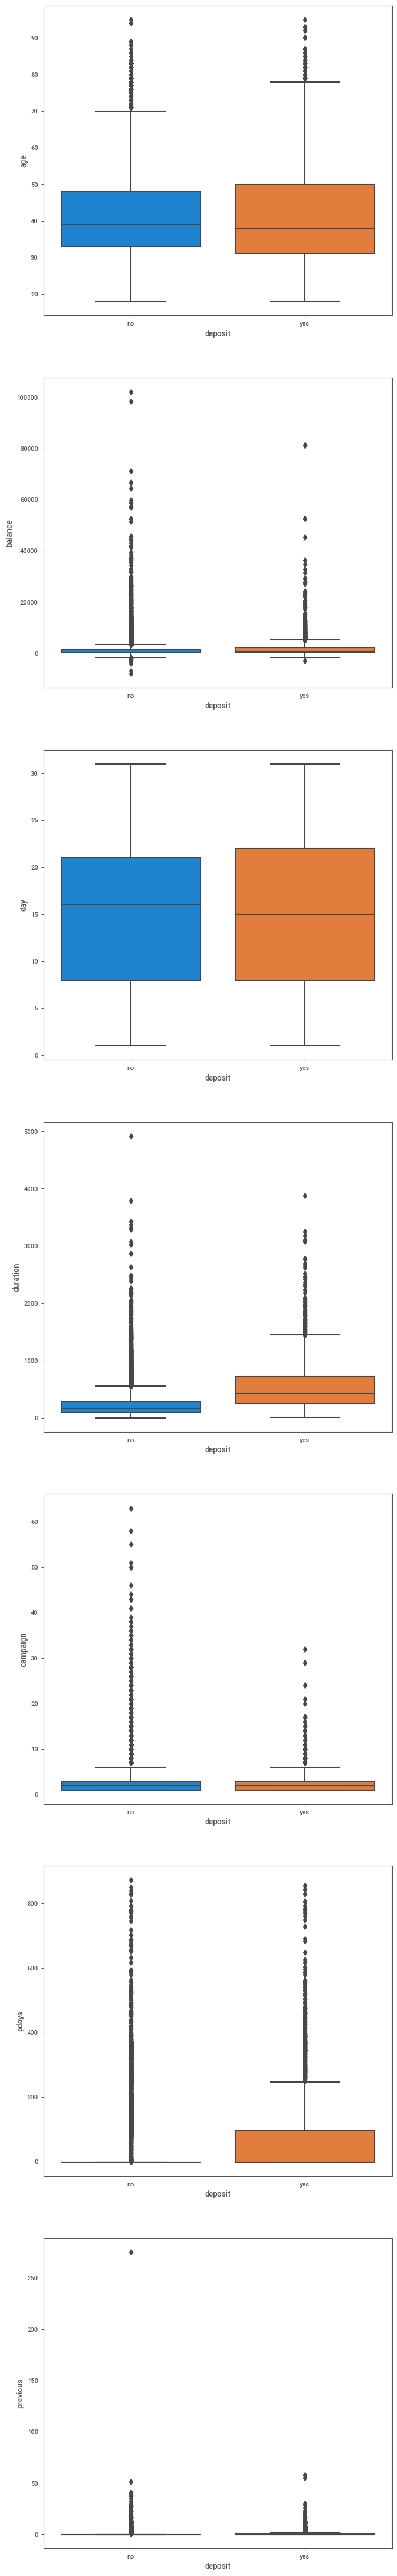

In [24]:
fig, axes = plt.subplots(7, 1, figsize=(8, 60))
for i, c in enumerate(num_var.columns):
  sns.boxplot(data=df,x='deposit',y=c,ax=axes[i])  

# for i in num_var.columns:
#   sns.boxplot(x = 'deposit', y = i, data = df)


In [25]:
Q1_d = df['duration'].quantile(.25)
Q3_d = df['duration'].quantile(.75)
Q1_a = df['age'].quantile(.25)
Q3_a = df['age'].quantile(.75)
Q1_c = df['campaign'].quantile(.25)
Q3_c = df['campaign'].quantile(.75)

In [26]:
print(Q1_d, Q3_d,Q1_a, Q3_a,Q1_c,Q3_c)

103.0 319.0 33.0 48.0 1.0 3.0


In [27]:
IQR_d = Q3_d - Q1_d
IQR_a = Q3_a - Q1_a
IQR_c = Q3_c - Q1_c

print(IQR_d)
print(IQR_a)
print(IQR_c)

216.0
15.0
2.0


In [28]:
lower_d = Q1_d - 1.5 * IQR_d
upper_d = Q3_d + 1.5 * IQR_d
lower_a = Q1_a - 1.5 * IQR_a
upper_a = Q3_a + 1.5 * IQR_a
lower_c = Q1_c - 1.5 * IQR_c
upper_c = Q3_c + 1.5 * IQR_c

print(lower_d,upper_d)
print(lower_a,upper_a)
print(lower_c,upper_c)

-221.0 643.0
10.5 70.5
-2.0 6.0


Duration <- Above 643. second is outliers for duration

Age <- Above 70.5 years is outliers

campaign <- above 6.0 is outliers

In [ ]:
# df_out3 = df[df['duration'] <= 643.0]
# # df_out3.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no


In [ ]:
# df_outt= df.loc[df['duration']>= 643.0,'duration'] = 258.16

In [ ]:
# len(df[df['duration']>= 643.0])

3247

In [ ]:
# len(df[df['duration'] == 261.0])

73

In [ ]:
# df_out3.shape

(41976, 17)

In [ ]:
# df_out4 = df_out3[df_out3['age']<= 70.5]
# df_out4.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no


In [ ]:
# df_out5 = df_out4[df_out4['campaign']<= 6.0]
# df_out5.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no


In [ ]:
# df_out5.shape

(38667, 17)

In [ ]:
# df.shape

(45211, 17)

In [29]:
cat_var.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

In [30]:
print(f"Missing value in job variable: {len(df[df['job'] == 'unknown'])}")
print(f"Missing value in marital variable: {len(df[df['marital'] == 'unknown'])}")
print(f"Missing value in education variable: {len(df[df['education'] == 'unknown'])}")
print(f"Missing value in default variable: {len(df[df['default'] == 'unknown'])}")
print(f"Missing value in housing variable: {len(df[df['housing'] == 'unknown'])}")
print(f"Missing value in loan variable: {len(df[df['loan'] == 'unknown'])}")
print(f"Missing value in contact variable: {len(df[df['contact'] == 'unknown'])}")
print(f"Missing value in month variable: {len(df[df['month'] == 'unknown'])}")
print(f"Missing value in poutcome variable: {len(df[df['poutcome'] == 'unknown'])}")

Missing value in job variable: 288
Missing value in marital variable: 0
Missing value in education variable: 1857
Missing value in default variable: 0
Missing value in housing variable: 0
Missing value in loan variable: 0
Missing value in contact variable: 13020
Missing value in month variable: 0
Missing value in poutcome variable: 36959


In [31]:
df.shape

(45211, 17)

In [32]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

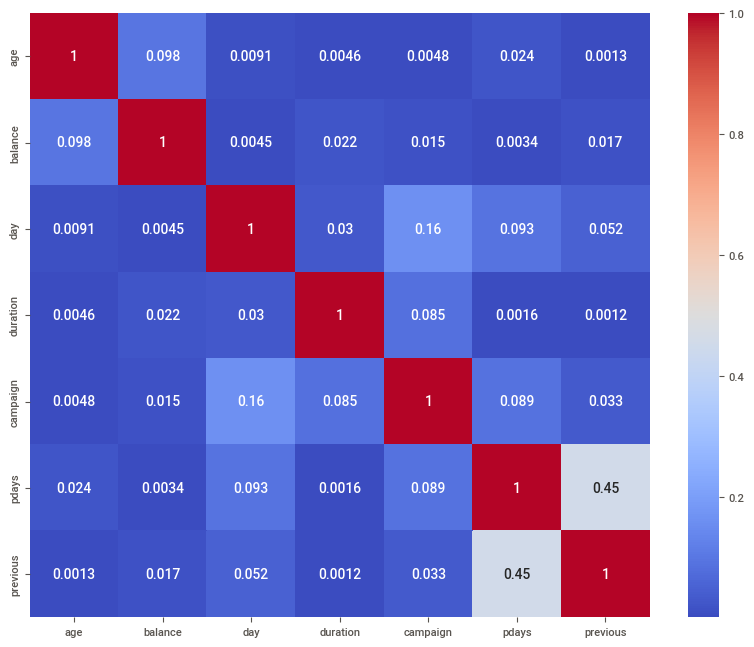

In [33]:
# Creating correlation heat map.
plt.figure(figsize=(10,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [34]:
df2=df.copy()

In [35]:
df2.loc[df2['education']=='unknown','education']=df['education'].mode().iloc[0]

In [36]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,secondary,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,secondary,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [37]:
df2.loc[df2['job']=='unknown','job']=df2['job'].mode().iloc[0]

In [38]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,secondary,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,blue-collar,single,secondary,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [39]:
df2.drop(['poutcome', 'contact','balance', 'duration'], axis=1, inplace=True)
df2.head()

,age,job,marital,education,default,housing,loan,day,month,campaign,pdays,previous,deposit
0,58,management,married,tertiary,no,yes,no,5,may,1,-1,0,no
1,44,technician,single,secondary,no,yes,no,5,may,1,-1,0,no
2,33,entrepreneur,married,secondary,no,yes,yes,5,may,1,-1,0,no
3,47,blue-collar,married,secondary,no,yes,no,5,may,1,-1,0,no
4,33,blue-collar,single,secondary,no,no,no,5,may,1,-1,0,no


In [40]:
df2.shape

(45211, 13)

# **Applying lable encoding and one hot encoding**

In [41]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column .
labled_col=['default','loan','housing','deposit']
for i in labled_col:
  df2[i]= label_encoder.fit_transform(df2[i])
  


In [42]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [43]:
df2.head()

,age,job,marital,education,default,housing,loan,day,month,campaign,pdays,previous,deposit
0,58,management,married,tertiary,0,1,0,5,may,1,-1,0,0
1,44,technician,single,secondary,0,1,0,5,may,1,-1,0,0
2,33,entrepreneur,married,secondary,0,1,1,5,may,1,-1,0,0
3,47,blue-collar,married,secondary,0,1,0,5,may,1,-1,0,0
4,33,blue-collar,single,secondary,0,0,0,5,may,1,-1,0,0


In [44]:
df3= pd.get_dummies(df2, columns = ['job','marital','education','month'])

pd.set_option('display.max_columns', None)
df3.head()

,age,default,housing,loan,day,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,1,0,5,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,44,0,1,0,5,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,33,0,1,1,5,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,47,0,1,0,5,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,33,0,0,0,5,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [45]:
df3.shape

(45211, 38)

In [46]:
df4 = df3.drop(['job_admin.','marital_divorced','education_primary', 'month_sep'], axis=1)
df4.shape

(45211, 34)

In [47]:
df4.head(1)

,age,default,housing,loan,day,campaign,pdays,previous,deposit,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_secondary,education_tertiary,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
0,58,0,1,0,5,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [48]:
df5=df4.copy()

In [77]:
# def df_column_switch(df, column1, column2):
#     i = list(df.columns)
#     a, b = i.index(column1), i.index(column2)
#     i[b], i[a] = i[a], i[b]
#     df = df[i]
#     return df

In [79]:
df_column_switch(df6, deposit, month_oct)

NameError: ignored

In [49]:
list(df5.columns)

['age',
 'default',
 'housing',
 'loan',
 'day',
 'campaign',
 'pdays',
 'previous',
 'deposit',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'marital_married',
 'marital_single',
 'education_secondary',
 'education_tertiary',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_feb',
 'month_jan',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct']

In [50]:
column_names = ['age',
 'default',
 'housing',
 'loan',
 'day',
 'campaign',
 'pdays',
 'previous',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'marital_married',
 'marital_single',
 'education_secondary',
 'education_tertiary',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_feb',
 'month_jan',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct','deposit']

In [51]:
df5 = df5.reindex(columns=column_names)

In [52]:
df5.head(1)

,age,default,housing,loan,day,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_secondary,education_tertiary,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,deposit
0,58,0,1,0,5,1,-1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [53]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import log_loss
import warnings
from sklearn.metrics import confusion_matrix
warnings.filterwarnings('ignore')

# **Applying SMOT**

In [54]:
# Creating the dataset with all independent variables
X = df5.iloc[:,:-1]

# Creating the dataset with the dependent variable
Y = df5.iloc[:,-1]

print('x original=',X.shape)
print('y original=', Y.shape)

x original= (45211, 33)
y original= (45211,)


In [55]:
# Applying SMOT
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df5.iloc[:,0:-1], df5['deposit'])




print('x after SMOT=',x_smote.shape)
print('y after SMOT=', y_smote.shape)

x after SMOT= (79844, 33)
y after SMOT= (79844,)


In [56]:
y_smote.value_counts()

0    39922
1    39922
Name: deposit, dtype: int64

In [57]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 1)

In [58]:
print("Distribution of classes of dependent variable in train :")
print(Y_train.value_counts())

print("\n Distribution of classes of dependent variable in test :")
print(Y_test.value_counts())

Distribution of classes of dependent variable in train :
1    31938
0    31937
Name: deposit, dtype: int64

 Distribution of classes of dependent variable in test :
0    7985
1    7984
Name: deposit, dtype: int64


In [59]:
X_train.shape

(63875, 33)

In [60]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_train, Y_train)

LogisticRegression(max_iter=10000)

In [61]:
# Get the model coefficients
clf.coef_

array([[-2.69411440e-02, -1.21459749e+00, -1.04608433e+00,
        -1.18982130e+00, -6.56383794e-03, -1.47226692e-01,
         8.39222708e-04,  2.51395944e-02, -2.22536173e+00,
        -2.73289331e+00, -3.34354951e+00, -1.83012247e+00,
        -1.38026931e+00, -2.38238169e+00, -2.18575136e+00,
        -1.57321570e+00, -1.98748309e+00, -2.34127624e+00,
        -1.18742035e+00, -1.10516237e+00, -1.27122308e+00,
        -9.06836194e-01, -3.65365484e+00, -4.24226388e+00,
        -3.11769841e+00, -4.21441606e+00, -5.01159449e+00,
        -4.25160975e+00, -4.51694965e+00, -2.95452280e+00,
        -4.30097391e+00, -4.37545859e+00, -3.05505444e+00]])

In [62]:
clf.intercept_

array([8.74952438])

In [63]:
# Get the predicted probabilities
train_preds = clf.predict_proba(X_train)
test_preds = clf.predict_proba(X_test)

In [64]:
X_test

,age,default,housing,loan,day,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_secondary,education_tertiary,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
30253,33,0,1,0,5,2,233,3,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0
77216,35,0,0,0,22,1,183,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
47724,35,0,0,1,20,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
47671,45,0,0,0,7,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8711,57,0,1,1,4,8,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52916,41,0,1,0,11,1,461,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
42773,39,0,1,1,28,2,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
79094,25,0,0,0,10,3,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
13276,35,0,0,1,8,2,-1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [66]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [67]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,Y_train)
test_accuracy = accuracy_score(test_class_preds,Y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.866426614481409
The accuracy on test data is  0.8696850147160122


In [68]:
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

In [69]:
print('ROCAUC score:', roc_auc_score(test_class_preds, Y_test))
print('Accuracy score:', accuracy_score(test_class_preds, Y_test))

ROCAUC score: 0.8726412266209751
Accuracy score: 0.8696850147160122
